Où se trouve le dossier sur la machine ?
http://10.117.49.59:8888/notebooks/Puce/analysedata/analyses_jupyter/analyses_Guillaume/Bord/Test_GGD_Pi.ipynb

In [1]:
# pour telecharder de la machine à mon ordinateur local
import os

def sync_files(user, host, password, remote_path, local_path=None):
    if local_path is None:
        local_path = os.getcwd()

    # Détection : est-ce un fichier (on regarde si un nom de fichier semble être présent) ?
    is_file = os.path.splitext(local_path)[1] != ""

    if is_file:
        # Cas fichier : on s'assure que le dossier contenant le fichier existe
        local_dir = os.path.dirname(local_path)
        if not os.path.exists(local_dir):
            print(f"📁 Création du dossier parent : {local_dir}")
            os.makedirs(local_dir)
        command = f'sshpass -p "{password}" rsync -ah --progress -u "{user}@{host}:{remote_path}" "{local_path}"'
    else:
        # Cas dossier : on crée le dossier si nécessaire
        if not os.path.exists(local_path):
            print(f"📁 Création du dossier : {local_path}")
            os.makedirs(local_path)
        command = f'sshpass -p "{password}" rsync -ah --progress -u "{user}@{host}:{remote_path}" "{local_path}"'

    print(f"🚀 Exécution : {command}")
    !{command}



In [3]:
# Définition des informations communes
PASSWORD="Cedt,ll?"
USER="isabelle.bouchoule"
HOST="10.117.49.59"

In [5]:
# parametre selectionné
nom1 = "theta_edge_1.0_ih1"
nom2 = "theta_edge_1.0_ih2"
date = "2025-01-27"
mu , T , x0 , Taille = 64.676, 559.424, 18.339, 22.089

In [7]:
import os

index_last_underscore = nom2.rfind('_')
remote_path0 ="/home/isabelle.bouchoule/Puce/analysedata/analyses_jupyter/analyses_Guillaume/Bord/"
local_path = os.getcwd()

# theta
filename = f"{date}/theta_discr_{nom2[index_last_underscore+1:]}.npz"
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )

# nu
filename = f"{date}/nu_discr_{nom1[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz" 
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )

# veff
filename = f"{date}/veff_bord_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz"
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )


✅ Fichier 'donnees1.dat' écrit avec 50 lignes.
✅ Fichier enregistré sous : insitut.table
✅ Fichier enregistré sous : insitut_minus.table


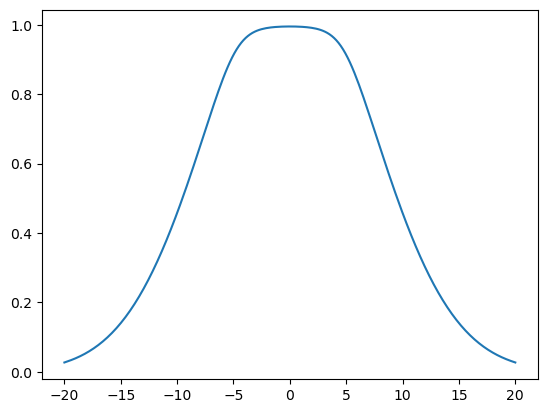

In [9]:
import numpy as np
import matplotlib.pyplot as plt

filename = f"{date}/theta_discr_{nom2[index_last_underscore+1:]}.npz"
theta_discr = np.load(filename)

filename = f"{date}/nu_discr_{nom1[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz" 
nu0 = np.load(filename)

filename = f"{date}/veff_bord_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz"
veff_bord_discr = np.load(filename)

Temp_bord = 18

plt.plot(theta_discr , nu0 )

def write_triplet_data(x_list, y_list, z_list, filepath="donnees.dat"):
    if not (len(y_list) == len(z_list)):
        raise ValueError("Les listes y et z doivent avoir la même longueur.")

    with open(filepath, "w") as f:
        f.write("x y z\n")  # en-tête facultatif, tu peux le retirer
        for x in x_list : 
            for y, z in zip(y_list, z_list):
                f.write(f"{x} {y} {z}\n")

    print(f"✅ Fichier '{filepath}' écrit avec {len(x_list)} lignes.")

write_triplet_data(theta_discr[::4], theta_discr[::2], nu0[::2], "donnees1.dat")

def save_as_tikz_table(x, y, filename="plot.table"):
    """
    Enregistre les listes x et y dans un fichier .table pour TikZ.
    Format :
    #Curve 0, N points
    #x y type
    x1 y1 i
    x2 y2 i
    ...
    """
    assert len(x) == len(y), "x et y doivent avoir la même longueur"
    n_points = len(x)

    with open(filename, "w") as f:
        f.write(f"#Curve 0, {n_points} points\n")
        f.write("#x y type\n")
        #f.write(f"{-9:.5f} {0:.5f} i\n")
        for xi, yi in zip(x, y):
            f.write(f"{xi:.5f} {yi:.5f} i\n")
        #f.write(f"{9:.5f} {0:.5f} i\n")

    print(f"✅ Fichier enregistré sous : {filename}")

save_as_tikz_table(theta_discr*8.8/20, nu0*5, filename="insitut.table")
save_as_tikz_table(theta_discr*8.8/20, -nu0*5, filename="insitut_minus.table")

# x y type
-8.80000 0.13537 i
-8.71156 0.14643 i
-8.62312 0.15790 i
-8.53467 0.17002 i
-8.44623 0.18288 i
-8.35779 0.19655 i
-8.26935 0.21106 i
-8.18090 0.22647 i
-8.09246 0.24281 i
-8.00402 0.26013 i
-7.91558 0.27848 i
-7.82714 0.29790 i
-7.73869 0.31843 i
-7.65025 0.34013 i
-7.56181 0.36303 i
-7.47337 0.38718 i
-7.38492 0.41263 i
-7.29648 0.43942 i
-7.20804 0.46760 i
-7.11960 0.49722 i
-7.03116 0.52833 i
-6.94271 0.56096 i
-6.85427 0.59516 i
-6.76583 0.63098 i
-6.67739 0.66845 i
-6.58894 0.70763 i
-6.50050 0.74854 i
-6.41206 0.79124 i
-6.32362 0.83574 i
-6.23518 0.88210 i
-6.14673 0.93034 i
-6.05829 0.98048 i
-5.96985 1.03257 i
-5.88141 1.08662 i
-5.79296 1.14265 i
-5.70452 1.20068 i
-5.61608 1.26072 i
-5.52764 1.32280 i
-5.43920 1.38690 i
-5.35075 1.45304 i
-5.26231 1.52122 i
-5.17387 1.59142 i
-5.08543 1.66364 i
-4.99698 1.73785 i
-4.90854 1.81405 i
-4.82010 1.89220 i
-4.73166 1.97227 i
-4.64322 2.05423 i
-4.55477 2.13803 i
-4.46633 2.22362 i
-4.37789 2.31094 i
-4.28945 2.39994 i
-

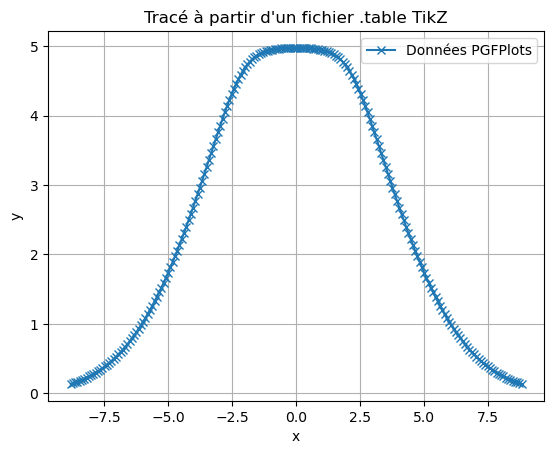

In [11]:
import matplotlib.pyplot as plt

def read_and_plot_table(filename):
    """
    Lit un fichier .table au format TikZ (PGFPlots),
    affiche les données, et trace le graphe.
    """
    x, y,  typ= [], [] , []
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith('#') or not line.strip():
                continue
            parts = line.strip().split()
            if len(parts) >= 2:
                x.append(float(parts[0]))
                y.append(float(parts[1]))
                typ.append(parts[2])

    # Afficher les données dans le terminal
    print("# x y type")
    for xi, yi , i in zip(x, y , typ):
        print(f"{xi:.5f} {yi:.5f} {i}")

    # Tracer
    plt.plot(x, y, marker='x', linestyle='-', label='Données PGFPlots')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Tracé à partir d'un fichier .table TikZ")
    plt.grid(True)
    plt.legend()
    plt.show()

read_and_plot_table(filename="insitut.table")

/var/folders/sc/1jlhfymx3sg5vz8q1fx87pvr0000gn/T/ipykernel_67651/3627408683.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("donnees1.dat", delim_whitespace=True)


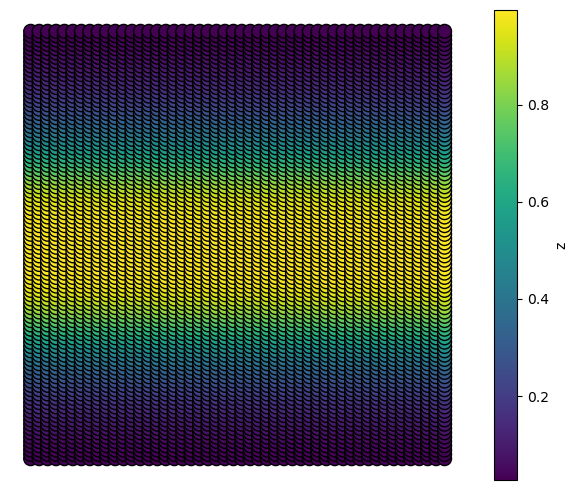

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("donnees1.dat", delim_whitespace=True)

# Extraire x, y, z
x = df['x']
y = df['y']
z = df['z']

# Création de la figure
plt.figure(figsize=(6, 5))
scatter = plt.scatter(x, y, c=z, cmap='viridis', s=100, edgecolor='k')
plt.colorbar(scatter, label='z')
plt.xticks([])  # Pas de graduations sur x
plt.yticks([])  # Pas de graduations sur y
plt.box(False)  # Enlever les bordures de l’axe
plt.tight_layout()
plt.show()


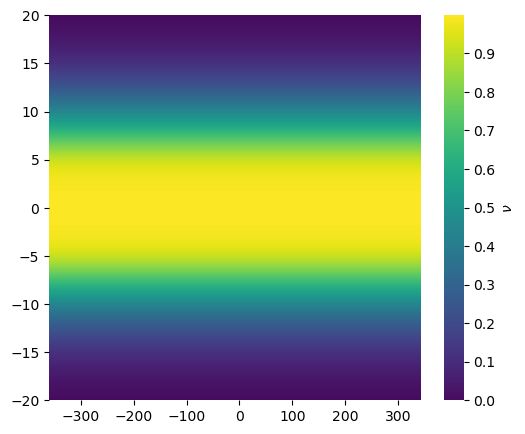

In [15]:
from matplotlib.ticker import FormatStrFormatter

vmin=0
vmax=1
X, Y = np.meshgrid(veff_bord_discr*Temp_bord, theta_discr)
# ➤ Plus de niveaux pour une couleur plus continue
nb_levels = 1000

# Exemple simple
fig, ax = plt.subplots(figsize=(6, 5)) 
cf = ax.contourf( X, Y,   np.array([nu0 for v in veff_bord_discr]).T, levels=nb_levels , cmap='viridis' , vmin=vmin, vmax=vmax , alpha = 1)

# Supprimer les traits noirs autour de la figure
for spine in ax.spines.values():
    spine.set_visible(False)

# Colorbar avec 21 décimales
cbar = plt.colorbar(cf , label= r'$\nu$')
cbar.outline.set_visible(False)
cbar.formatter = FormatStrFormatter('%.1f')
cbar.update_ticks()

# Sauvegarde
plt.savefig("insitut.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

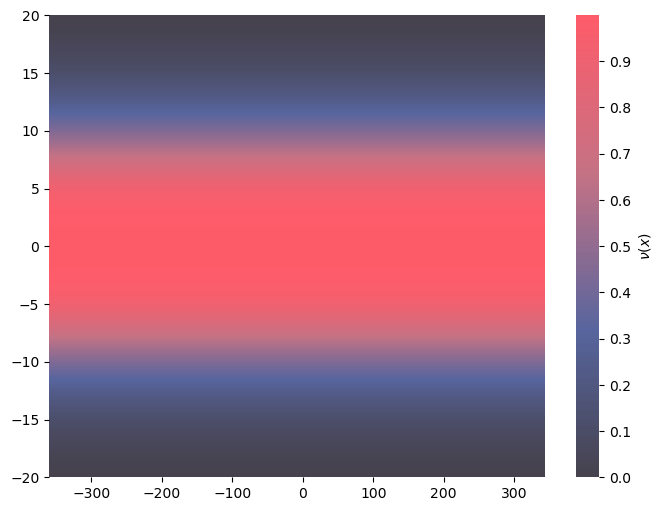

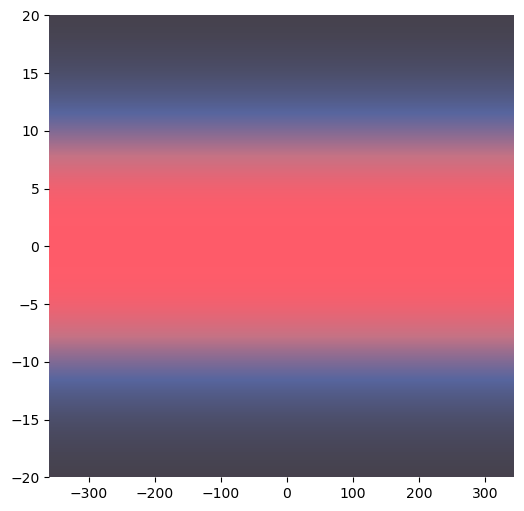

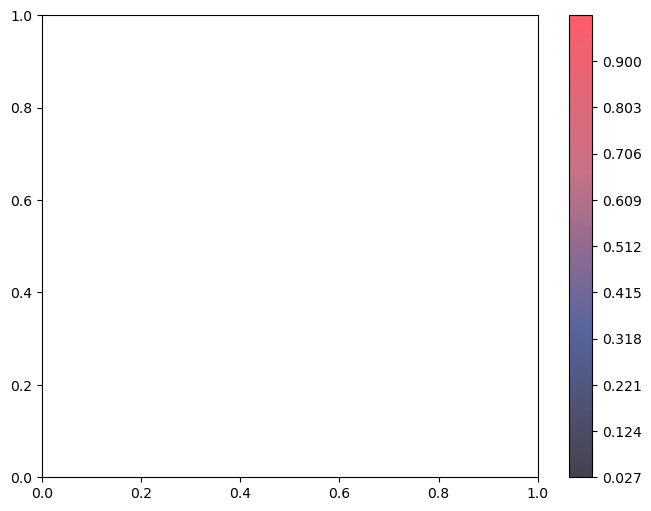

In [19]:
# Définir vmin et vmax pour la colorbar
from matplotlib.colors import LinearSegmentedColormap
# Définition des couleurs HTML
colors = ['#443E46' , '#908CA4' ,  '#57659E', '#F6DEB8' ,  '#C57284', '#FF5B69']  # colorFour → colorFive → colorSix
colors = ['#443E46'  ,  '#57659E' ,   '#C57284' ,'#FF5B69'  ]
#\definecolor{colorOne}{HTML}{443E46}
#\definecolor{colorTwo}{HTML}{F6DEB8}
#\definecolor{colorThree}{HTML}{908CA4}
#\definecolor{colorFour}{HTML}{57659E}
#\definecolor{colorFive}{HTML}{C57284}
#\definecolor{colorSix}{HTML}{FF5B69}
# Création du colormap continu
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

vmin = 0
vmax = 1

# Créer les maillages X et Y
X, Y = np.meshgrid(veff_bord_discr * Temp_bord, theta_discr)

# Définir les niveaux pour un contour plus continu
nb_levels = 1000

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(8, 6))

# Créer un graphique de contours
cf = ax.contourf(X, Y, np.array([nu0 for v in veff_bord_discr]).T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)

# Supprimer les traits noirs autour de la figure
for spine in ax.spines.values():
    spine.set_visible(False)

# Ajouter la barre de couleur avec 1 décimale
cbar = plt.colorbar(cf, ax=ax, label=r'$\nu(x)$')
cbar.outline.set_visible(False)
cbar.formatter = FormatStrFormatter('%.1f')
cbar.update_ticks()

# Sauvegarder le graphique complet avec les axes et la colorbar
fig.savefig("complete_graph_insitut.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Sauvegarder les axes sans le graphique ni la colorbar
fig_axes, ax_axes = plt.subplots(figsize=(6, 6))
ax_axes.contourf(X, Y, np.array([nu0 for v in veff_bord_discr]).T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)
#ax_axes.set_axis_off()  # Masquer les axes
# Supprimer les traits noirs autour de la figure
for spine in ax_axes.spines.values():
    spine.set_visible(False)
fig_axes.savefig("graph_insitut_only.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Sauvegarder la colorbar seule
fig_cbar, ax_cbar = plt.subplots(figsize=(8, 6))
cbar = plt.colorbar(cf, ax=ax_cbar)
fig_cbar.savefig("colorbar_insitut_only.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Afficher la figure
plt.show()

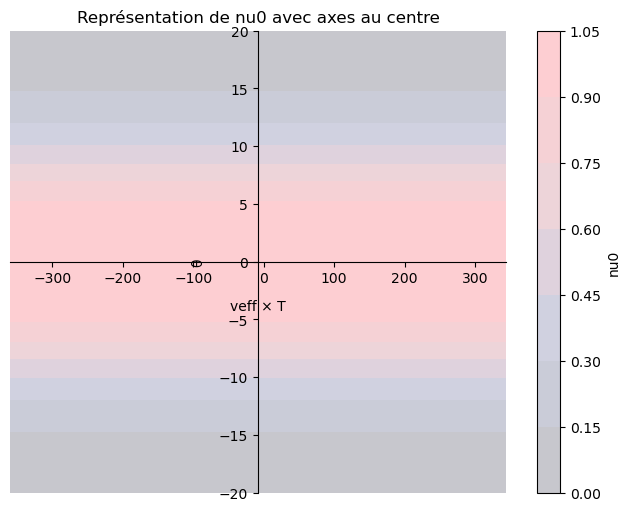

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Exemple de données (à adapter aux tiennes)
# veff_bord_discr = np.linspace(-1, 1, 50)
# theta_discr = np.linspace(-np.pi, np.pi, 50)
# Temp_bord = 1.0
# nu0 = np.random.rand(len(theta_discr), len(veff_bord_discr))

vmin = 0
vmax = 1

X, Y = np.meshgrid(veff_bord_discr * Temp_bord, theta_discr)

fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y,np.array([nu0 for v in veff_bord_discr]).T, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=0.3)
plt.colorbar(contour, ax=ax, label='nu0')

# Déplacement des axes au centre
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Cache les axes du haut et de droite
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Déplace les ticks des axes vers le centre
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Labels
ax.set_xlabel("veff × T", labelpad=10)
ax.set_ylabel("θ", labelpad=10)
ax.set_title("Représentation de nu0 avec axes au centre")

plt.show()


✅ Fichier enregistré sous : bord_0_0.table


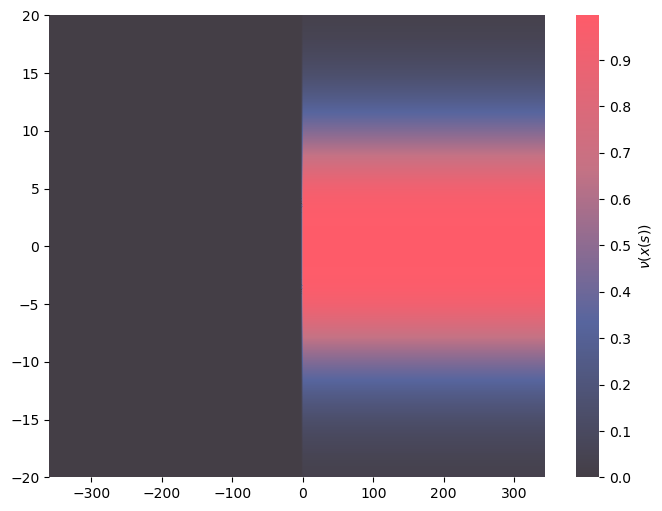

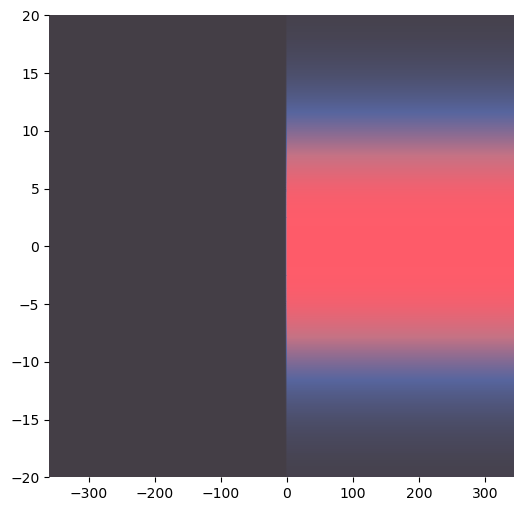

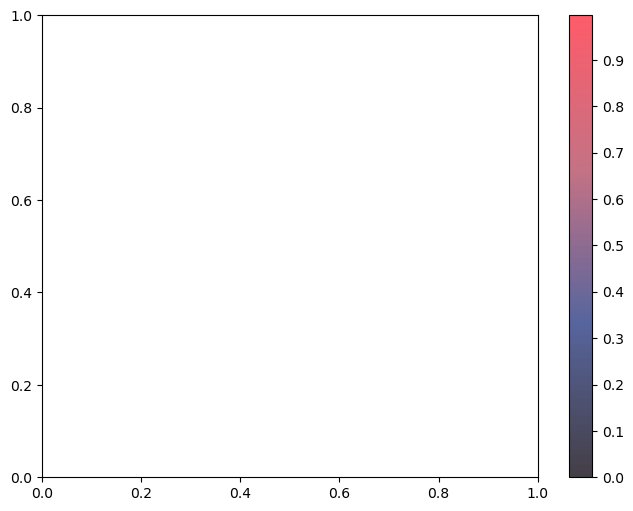

In [28]:
filename = f"{date}/density_expansion_nu_{nom1}_{mu:.3f}_{T:.3f}_{0:.3f}.npz" 
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
mydensity = np.load(filename)

save_as_tikz_table(mydensity[0,:]*8.8/350, theta_discr*8.8/20, filename="bord_0_0.table")

# Définir vmin et vmax pour la colorbar
vmin = 0
vmax = 1

# Créer les maillages X et Y
X, Y = np.meshgrid(veff_bord_discr * Temp_bord, theta_discr)

# Définir les niveaux pour un contour plus continu
nb_levels = 1000

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(8, 6))

# Créer un graphique de contours
cf = ax.contourf(X, Y, np.array([nu0 if v > 0 else np.zeros(len(nu0)) for v in veff_bord_discr]).T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)
#ax.plot(mydensity[0,:] ,theta_discr , color="#F6DEB8", linewidth=4 , alpha = 0.5 ) 



# Supprimer les traits noirs autour de la figure
for spine in ax.spines.values():
    spine.set_visible(False)

# Ajouter la barre de couleur avec 1 décimale
cbar = plt.colorbar(cf, ax=ax, label=r'$\nu(x(s))$')
cbar.outline.set_visible(False)
cbar.formatter = FormatStrFormatter('%.1f')
cbar.update_ticks()

# Sauvegarder le graphique complet avec les axes et la colorbar
fig.savefig("complete_graph_coupure_1_0.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Sauvegarder les axes sans le graphique ni la colorbar
fig_axes, ax_axes = plt.subplots(figsize=(6, 6))
ax_axes.contourf(X, Y, np.array([nu0 if v > 0 else np.zeros(len(nu0)) for v in veff_bord_discr]).T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)
#ax_axes.set_axis_off()  # Masquer les axes
#ax_axes.plot(mydensity[0,:] ,theta_discr , color="#F6DEB8", linewidth=4 , linestyle='-.',  alpha = 0.4 ) 
# Supprimer les traits noirs autour de la figure
for spine in ax_axes.spines.values():
    spine.set_visible(False)
fig_axes.savefig("graph_coupure_1_0_only.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Sauvegarder la colorbar seule
fig_cbar, ax_cbar = plt.subplots(figsize=(8, 6))
cbar = plt.colorbar(cf, ax=ax_cbar)
fig_cbar.savefig("colorbar_coupure_1_0_only.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Afficher la figure
plt.show()

✅ Fichier enregistré sous : bord_0_sur_18.table


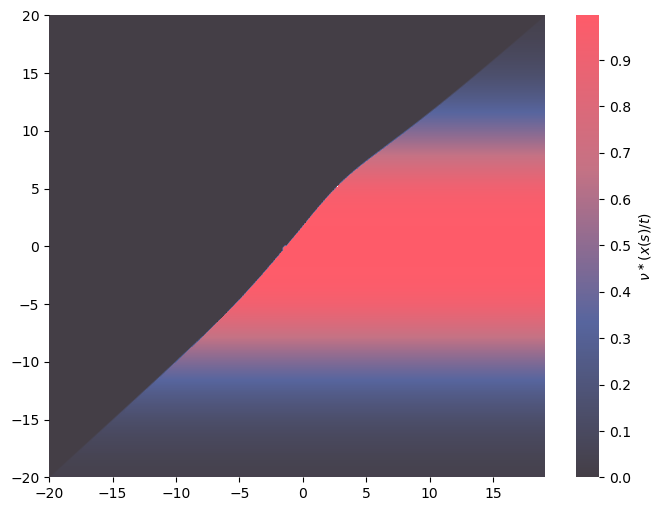

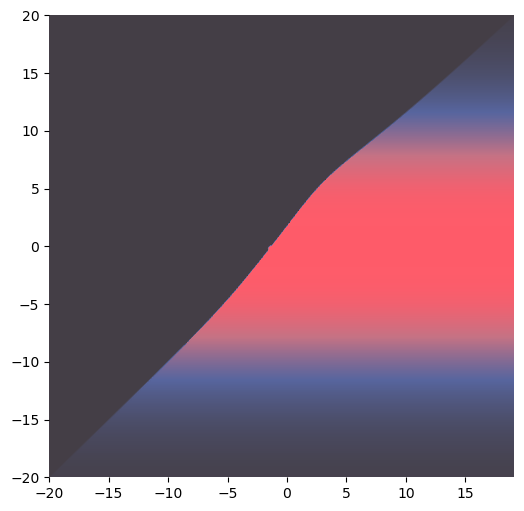

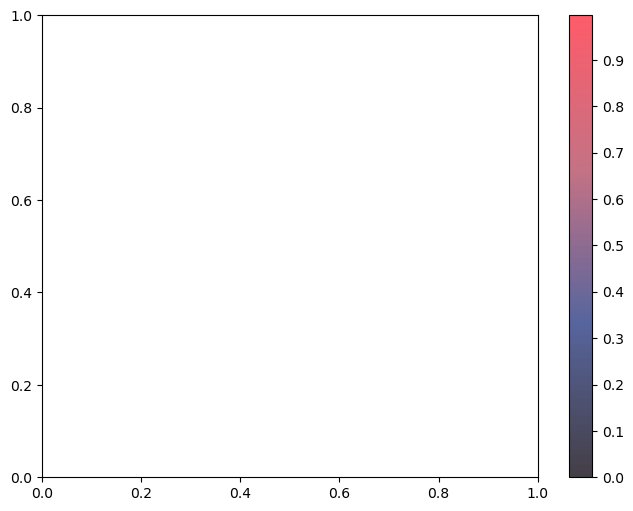

✅ Fichier enregistré sous : coupure_1_sur_18.table
🚀 Exécution : sshpass -p "Cedt,ll?" rsync -ah --progress -u "isabelle.bouchoule@10.117.49.59:/home/isabelle.bouchoule/Puce/analysedata/analyses_jupyter/analyses_Guillaume/Bord/2025-01-27/theta_edge_1.0_ih2_64.676_559.424_18.339.npz" "/Users/themezeguillaume/Desktop/Scroll_Web/quantum-mechanics-thesis-main/These_Memoire/BiPart/Figures/data/2025-01-27/theta_edge_1.0_ih2_64.676_559.424_18.339.npz"
ssh: connect to host 10.117.49.59 port 22: Operation timed out
rsync: connection unexpectedly closed (0 bytes received so far) [receiver]
rsync error: unexplained error (code 255) at /AppleInternal/Library/BuildRoots/e0873e53-5185-11ef-9a51-9ab6d782fe32/Library/Caches/com.apple.xbs/Sources/rsync/rsync/io.c(453) [receiver=2.6.9]
3.1920263799915936
✅ Fichier enregistré sous : coupure_1_sur_18.table
# x y type
-8.80000 0.13537 i
-8.71156 0.14643 i
-8.62312 0.15790 i
-8.53467 0.17002 i
-8.44623 0.18288 i
-8.35779 0.19655 i
-8.26935 0.21106 i
-8.1809

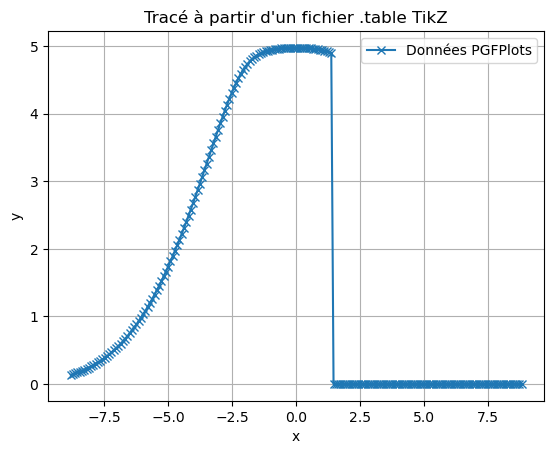

In [27]:
filename = f"{date}/density_expansion_nu_{nom1}_{mu:.3f}_{T:.3f}_veff_bord.npz" 
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
mydensity = np.load(filename)

#print ( "max" , max(mydensity[0,:]) , max(theta_discr) ) 

save_as_tikz_table(mydensity[0,:]*8.63/max(mydensity[0,:]), theta_discr*8.8/max(theta_discr), filename="bord_0_sur_18.table")

# Définir vmin et vmax pour la colorbar
import numpy as np
from scipy.interpolate import interp1d
# Fonction d'interpolation linéaire
def LinearInterpolation(x, y):
    return interp1d(x, y, kind='linear', fill_value="extrapolate")
    
theta_veff_fun = LinearInterpolation(veff_bord_discr, theta_discr) 
nu_fun = LinearInterpolation(theta_discr , nu0)
mat_nu = np.array([ np.where(  theta_discr <theta_veff_fun(v),  nu0 , 0 ) for v in veff_bord_discr])

vmin = 0
vmax = 1

# Créer les maillages X et Y
X, Y = np.meshgrid(veff_bord_discr , theta_discr)

# Définir les niveaux pour un contour plus continu
nb_levels = 1000

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(8, 6))

# Créer un graphique de contours
cf = ax.contourf(X, Y, mat_nu.T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)

# Supprimer les traits noirs autour de la figure
for spine in ax.spines.values():
    spine.set_visible(False)

# Ajouter la barre de couleur avec 1 décimale
cbar = plt.colorbar(cf, ax=ax, label=r'$\nu^\ast(x(s)/t)$')
cbar.outline.set_visible(False)
cbar.formatter = FormatStrFormatter('%.1f')
cbar.update_ticks()

# Sauvegarder le graphique complet avec les axes et la colorbar
fig.savefig("complete_graph_coupure_1_18.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Sauvegarder les axes sans le graphique ni la colorbar
fig_axes, ax_axes = plt.subplots(figsize=(6, 6))
ax_axes.contourf(X, Y, mat_nu.T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)
#ax_axes.set_axis_off()  # Masquer les axes
# Supprimer les traits noirs autour de la figure
for spine in ax_axes.spines.values():
    spine.set_visible(False)
fig_axes.savefig("graph_coupure_1_18_only.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Sauvegarder la colorbar seule
fig_cbar, ax_cbar = plt.subplots(figsize=(8, 6))
cbar = plt.colorbar(cf, ax=ax_cbar)
fig_cbar.savefig("colorbar_coupure_1_18_only.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Afficher la figure
plt.show()


save_as_tikz_table(theta_discr*8.8/20, np.array([nu0[i] if theta < 5/2.23*2 else 0 for i, theta in enumerate(theta_discr)])*5 , filename="coupure_1_sur_18.table")
filename = f"{date}/{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
theta_star = np.load(filename)
print(theta_star)

save_as_tikz_table(theta_discr*8.8/20, np.array([nu0[i] if theta < theta_star else 0 for i, theta in enumerate(theta_discr)])*5 , filename="coupure_1_sur_18.table")

read_and_plot_table(filename="coupure_1_sur_18.table")

🚀 Exécution : sshpass -p "Cedt,ll?" rsync -ah --progress -u "isabelle.bouchoule@10.117.49.59:/home/isabelle.bouchoule/Puce/analysedata/analyses_jupyter/analyses_Guillaume/Bord/2025-01-27/density_expansion_nu_theta_edge_1.0_ih1_64.676_559.424_veff_bord.npz" "/Users/themezeguillaume/Desktop/Scroll_Web/quantum-mechanics-thesis-main/Domain_Wall_Dynamics_for_a_1D_Bose_ga/Figures/data/2025-01-27/density_expansion_nu_theta_edge_1.0_ih1_64.676_559.424_veff_bord.npz"
receiving file list ... 
1 file to consider

sent 16 bytes  received 178 bytes  129.33 bytes/sec
total size is 3.28K  speedup is 16.91
✅ Fichier enregistré sous : density_coupure_1_sur_18.table
✅ Fichier enregistré sous : density_coupure_1_18.table


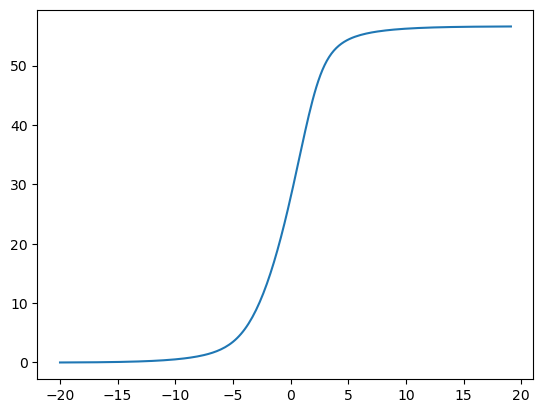

In [168]:
# density_expansion_nu
filename = f"{date}/density_expansion_nu_{nom1}_{mu:.3f}_{T:.3f}_veff_bord.npz"
sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
mudensity = np.load(filename)

plt.plot(mudensity[0,:] , mudensity[1,:])

def save_as_tikz_table(x, y, filename="plot.table"):
    """
    Enregistre les listes x et y dans un fichier .table pour TikZ.
    Format :
    #Curve 0, N points
    #x y type
    x1 y1 i
    x2 y2 i
    ...
    """
    assert len(x) == len(y), "x et y doivent avoir la même longueur"
    n_points = len(x)

    with open(filename, "w") as f:
        f.write(f"#Curve 0, {n_points} points\n")
        f.write("#x y type\n")
        #f.write(f"{-9:.5f} {0:.5f} i\n")
        for xi, yi in zip(x, y):
            f.write(f"{xi:.5f} {yi:.5f} i\n")
        #f.write(f"{9:.5f} {0:.5f} i\n")

    print(f"✅ Fichier enregistré sous : {filename}")

save_as_tikz_table(mudensity[0,:]*8.8/20, mudensity[1,:]*5/56 , filename="density_coupure_1_sur_18.table")

save_as_tikz_table(mudensity[0,:]*8.8/20*Temp_bord, mudensity[1,:]*5/56 , filename="density_coupure_1_18.table")

In [91]:
import numpy as np

# Définir les constantes
hbar = 1.05457182e-25   # um^2.kg/ms
mass =  1.44e-25        # kg (masse du Rubidium 87)
kB = 1.380649e-26       # um^2.ms^-2.kg.nK^{-1}
a3D = 5.3e-3            # um
om_perp = 2 * np.pi * 2.56  # kHz (fréquence transverse)

# Calculer les constantes dérivées
g = 2 * hbar * a3D * om_perp        # force de répulsion effective 1D
c = mass / hbar**2 * g              # um^{-1}
gbar = g / hbar

print(gbar)

0.17050051649562528


In [93]:
import numpy as np
from scipy.linalg import solve
from scipy.interpolate import interp1d
from scipy.sparse import diags
from scipy.sparse.linalg import inv

# -------------------------------------------------------------------------------------
# Dressing of function f (given as array f_discr, occupation ratio given as n_discr)
# -------------------------------------------------------------------------------------

def f_varphimat(lam_discr, gb):
    L = len(lam_discr)
    def varphi(lam):
        return 2 * gb / (gb**2 + lam**2)
    
    varphimat = np.zeros((L, L))
    
    for i in range(L):
        for j in range(i + 1):
            value = varphi(lam_discr[i] - lam_discr[j])
            varphimat[i, j] = value
            varphimat[j, i] = value
    
    return varphimat

def f_dlam(lam_discr):
    L = len(lam_discr)
    dlam = np.zeros(L)
    for i in range(1, L - 1):
        dlam[i] = 0.5 * (lam_discr[i + 1] - lam_discr[i - 1])
    dlam[0] = 0.5 * (lam_discr[1] - lam_discr[0])
    dlam[-1] = 0.5 * (lam_discr[-1] - lam_discr[-2])
    return dlam

def dress(gb, lam_discr, n_discr, f_discr):
    varphimat = f_varphimat(lam_discr, gb)
    dlam = f_dlam(lam_discr)
    A = np.eye(len(lam_discr)) - (0.5 / np.pi) * varphimat @ np.diag(n_discr) @ np.diag(dlam)
    return solve(A, f_discr)

# -------------------------------------------------------------------------------------
# To evaluate charge density associated with function f
# -------------------------------------------------------------------------------------

def charge_density(gb, lam_discr, n_discr, f_discr):
    L = len(lam_discr)
    def varphi(lam):
        return 2 * gb / (gb**2 + lam**2)

    #lam_discr_g = np.linspace((lam_discr[0]*3 - lam_discr[-1])/2 , lam_discr[0], int(L/2))
    #lam_discr_d = np.linspace(lam_discr[-1], (lam_discr[-1]*3 - lam_discr[0])/2 int(L/2))
    #lam_discr_exp = np.concatenate([lam_discr_g ,lam_discr , lam_discr_d]) 
    #lam_discr_exp = np.linspace((lam_discr[0]*3 - lam_discr[-1])/2, (lam_discr[-1]*3 - lam_discr[0])/2,  2*L ))
    lam_discr_exp = np.linspace( lam_discr[0], lam_discr[-1]*2 - lam_discr[0],  2*L )
    varphimat = np.zeros((2*L, 2*L))
    for i in range(L):
        for j in range(i + 1):
            value = varphi(lam_discr[i] - lam_discr[j])
            varphimat[i, j] = value
            varphimat[j, i] = value
    
    dlam_exp = f_dlam(lam_discr_exp)
    zeros_array = np.array([0] * L)
    n_discr_exp = np.concatenate([n_discr, zeros_array], axis=0)
    A = np.eye(2*L) - (0.5 / np.pi) * varphimat @ np.diag(n_discr_exp) @ np.diag(dlam_exp)
    f_discr_exp = np.ones(2*L)
    dressed_f = solve(A, f_discr_exp)[:L]
    dlam = f_dlam(lam_discr)
    return (0.5 / np.pi) * np.dot(dlam, np.diag(n_discr) @ dressed_f)

# -------------------------------------------------------------------------------------
# Solve Yang-Yang equation
# -------------------------------------------------------------------------------------

def fun1(z):
    if z > 0:
        return np.log(1 + np.exp(-z))
    else:
        return np.log(1 + np.exp(z)) - z

def fun2(z):
    if z < 0:
        return 1 / (1 + np.exp(z))
    else:
        return np.exp(-z) / (1 + np.exp(-z))

def yangyang(gb, beta, lam_discr):
    L = len(lam_discr)
    def varphi(lam):
        return 2 * gb / (gb**2 + lam**2)
    
    varphimat = np.zeros((L, L))
    for i in range(L):
        for j in range(i + 1):
            value = varphi(lam_discr[i] - lam_discr[j])
            varphimat[i, j] = value
            varphimat[j, i] = value
    
    dlam = f_dlam(lam_discr)
    bare_E = 0.5 * beta[2] * lam_discr**2 + beta[1] * lam_discr + beta[0]
    eps = bare_E.copy()
    n = np.array([fun2(e) for e in eps])
    
    diff = 1.0
    while diff > 1e-12:
        old_n = n.copy()
        eps = bare_E - (0.5 / np.pi) * varphimat @ np.diag([fun1(e) for e in eps]) @ dlam
        n = np.array([fun2(e) for e in eps])
        diff = np.linalg.norm(n - old_n)
    
    eps = bare_E - (0.5 / np.pi) * varphimat @ np.diag([fun1(e) for e in eps]) @ dlam
    n = np.array([fun2(e) for e in eps])
    return n

import numpy as np
from scipy.interpolate import interp1d

def eval_density(x1, x2, gb, theta_tab, n_fun, ratio_m_hbar):
    L = len(x1)
    dens = np.zeros((2, 2 * L))  # Matrice de densité
    
    # Interpolation/extrapolation pour x2
    f2 = interp1d(x2, theta_tab, kind='linear', fill_value="extrapolate")
    
    # Interpolation/extrapolation pour x1
    f1 = interp1d(x1, theta_tab, kind='linear', fill_value="extrapolate")
    
    # La densité pour les premiers et derniers points est zéro
    dens[0, 0] = x1[0]
    dens[1, 0] = 0
    dens[0, L] = x2[-1]
    dens[1, L] = 0
    
    # Calcul des densités pour x1
    for j in range(1, L):  # Parcours de 1 à L-1 (équivalent Julia 2:L)
        thet1 = theta_tab[j]
        if x1[j] < x2[0]:
            thet2 = theta_tab[0]
        else:
            thet2 = f2(x1[j])
        
        lam_discr = np.linspace(thet2, thet1, 600)  # LinRange équivalent
        n_discr = n_fun(lam_discr)
        
        dens[0, j] = x1[j]
        dens[1, j] = ratio_m_hbar * charge_density(gb, lam_discr, n_discr, np.ones(len(lam_discr)))
    
    # Calcul des densités pour x2 sans symétrie
    for j in range(L - 1):  # Parcours de 0 à L-2 (équivalent Julia 1:L-1)
        thet1 = theta_tab[j]
        if x2[j] > x1[-1]:
            thet2 = theta_tab[-1]
        else:
            thet2 = f1(x2[j])
        
        lam_discr = np.linspace(thet1, thet2, 600)  # LinRange équivalent
        n_discr = n_fun(lam_discr)
        
        dens[0, 2 * L - 1 - j] = x2[j]
        dens[1, 2 * L - 1 - j] = ratio_m_hbar * charge_density(gb, lam_discr, n_discr, np.ones(len(lam_discr)))
    
    # Trier les densités selon les positions
    sorted_indices = np.argsort(dens[0, :])
    dens_sorted = dens[:, sorted_indices]
    
    return dens_sorted

import numpy as np

def eval_edge_density(x, gb, theta_tab, nu_fun, ratio_m_hbar):
    npts_integral = 600

    L = len(x)
    dens = np.zeros((2, L))
    dens[0, 0] = x[0]
    dens[1, 0] = 0
    thet1 = theta_tab[0]

    for j in range(1, L):
        thet1 = theta_tab[j]
        thet2 = theta_tab[0]
        lam_discr = np.linspace(thet2, thet1, npts_integral)
        nu_discr = np.array([nu_fun(lam) for lam in lam_discr])
        dens[0, j] = x[j]
        dens[1, j] = ratio_m_hbar * charge_density(gb, lam_discr, nu_discr, np.ones(len(lam_discr)))

    print("la densité haute est :", dens[1, -1])

    # tri selon les positions x
    indices_sorted = np.argsort(dens[0, :])
    return dens[:, indices_sorted]


In [94]:
import numpy as np
from scipy.interpolate import interp1d

index_last_underscore = nom2.rfind('_')
theta_discr = np.load(f"{date}/theta_discr_{nom2[index_last_underscore+1:]}.npz")

filename = f"{date}/density_expansion_nu_{nom1}_{mu:.3f}_{T:.3f}_veff_bord.npz"
print ( 'filename =' ,filename )
x_bord , y_bord = np.load(filename)

Temp_bord = 18

# Fonction d'interpolation linéaire
def LinearInterpolation(x, y):
    return interp1d(x, y, kind='linear', fill_value="extrapolate")

# Interpolation linéaire
x_fun = LinearInterpolation(theta_discr, x_bord)  # Unité (µm/ms)
theta_fun = LinearInterpolation(x_bord, theta_discr)

# Calcul des limites x1 et x2
x_1 = (x0 - Taille / 2) / Temp_bord
x_2 = (x0 + Taille / 2) / Temp_bord

# Calcul des valeurs theta_1 et theta_2
theta_1 = theta_fun(x_1)
theta_2 = theta_fun(x_2)

# Calcul du maximum de |theta_1| et |theta_2|
max_abs_theta = max(20, abs(theta_1), abs(theta_2))

# Génération des bords pour theta_bord1 et theta_bord2
theta_bord1 = np.linspace(-max_abs_theta, theta_1, 100)
x1_bord1 = np.full(theta_bord1.shape, x_1)

# Génération de theta_bord2 et calcul de x1_bord2
theta_bord2 = np.linspace(theta_1 + 0.0000001, theta_2, 100)
L = len(theta_bord2)
x1_bord2 = np.zeros(L)

for i in range(L):
    x1_bord2[i] = x_fun(theta_bord2[i])

# Concaténation des bords pour theta_discr et x1
theta_discr_exp = np.concatenate([theta_bord1, theta_bord2], axis=0)
x1 = np.concatenate([x1_bord1, x1_bord2], axis=0) * Temp_bord/ Taille

# Calcul de x2
x2 = np.full(theta_discr.shape, x_2) * Temp_bord/ Taille

# Affichage des résultats (facultatif)
#print("theta_discr_exp:", theta_discr_exp)
#print("x1:", x1)
#print("x2:", x2)


filename = 2025-01-27/density_expansion_nu_theta_edge_1.0_ih1_64.676_559.424_veff_bord.npz


In [155]:
import numpy as np

def integ(x, y, tab, axes=(0,)):
    """
    Calcule l'intégrale discrète sur une ou plusieurs dimensions.

    Parameters:
    - x: numpy array, coordonnées discrètes de la première dimension.
    - y: numpy array, coordonnées discrètes de la deuxième dimension (ou autre).
    - tab: numpy array, tableau de valeurs à intégrer.
    - axes: tuple of int, axes sur lesquels effectuer l'intégration.

    Returns:
    - Résultat de l'intégration (scalaire ou tableau réduit).
    """
    # Assurez-vous que les axes sont sous forme de tuple
    if isinstance(axes, int):
        axes = (axes,)

    # Intégration séquentielle sur les axes spécifiés
    result = tab.copy()
    for axis in sorted(axes):
        if axis == 0:
            dx = np.diff(x)  # Différences des x
            weights = np.append(dx, dx[-1])  # Ajouter le dernier poids pour le bord
            result = np.sum(result * weights[:, None], axis=axis)  # Poids le long de l'axe 0
        elif axis == 1:
            dy = np.diff(y)  # Différences des y
            weights = np.append(dy, dy[-1])  # Ajouter le dernier poids pour le bord
            result = np.sum(result * weights[None, :], axis=axis)  # Poids le long de l'axe 1

    return result
    
filename = f"{date}/bord1_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
print ( 'filename =' ,filename )
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
bord1 = np.load(filename)
filename = f"{date}/bord2_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
print ( 'filename =' ,filename )
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
bord2 = np.load(filename)

def f_mat_nu_bord(v , theta , veff_bord_discr = veff_bord_discr , theta_discr = theta_discr , nu = nu0 , v1 = bord1*Taille/Temp_bord , v2 = bord2*Taille/Temp_bord , theta_discr_exp = theta_discr_exp ) :
    
    import numpy as np
    from scipy.interpolate import RegularGridInterpolator
    from scipy.interpolate import interp1d
    
    f_nu = interp1d(theta_discr, nu , kind='linear', bounds_error=False, fill_value="extrapolate")
    f_theta_discr_exp_1 = interp1d(v1, theta_discr_exp, kind='linear', bounds_error=False, fill_value="extrapolate")
    f_theta_discr_exp_2 = interp1d(v2, theta_discr_exp, kind='linear', bounds_error=False, fill_value="extrapolate")

    v_min = min(np.min ( v1 ) ,np.min ( v2)) 
    v_max = min(np.max ( v1 ) ,np.max ( v2))

    if v < v_min or v > v_max : return 0

    theta_min = min(theta_discr)
    theta_max = f_theta_discr_exp_1(v)
    if v < min(v2)  :        
        if theta > theta_max : return 0 
        return f_nu(theta) 
    else : 
        theta_min = f_theta_discr_exp_2(v)
        theta_min = f_theta_discr_exp_2(v)
        if (theta < theta_min) or (theta > theta_max) : return 0 
        return f_nu(theta) 

filename = 2025-01-27/bord1_theta_edge_1.0_ih2_64.676_559.424_16.563_22.089_0.000.npz


FileNotFoundError: [Errno 2] No such file or directory: '2025-01-27/bord1_theta_edge_1.0_ih2_64.676_559.424_16.563_22.089_0.000.npz'

[True, False, False, False, False, False, False]
filename = 2025-01-27/bord1_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz
filename = 2025-01-27/bord2_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz
✅ Fichier enregistré sous : bord_1_0.table
✅ Fichier enregistré sous : bord_2_0.table


Locator attempting to generate 1001 ticks ([-9.999999999999999e-14, ..., 1e-13]), which exceeds Locator.MAXTICKS (1000).


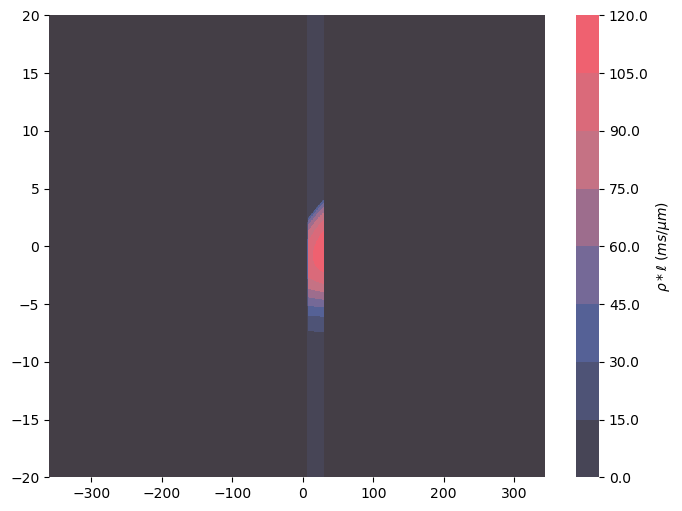

Locator attempting to generate 1001 ticks ([-9.999999999999999e-14, ..., 1e-13]), which exceeds Locator.MAXTICKS (1000).


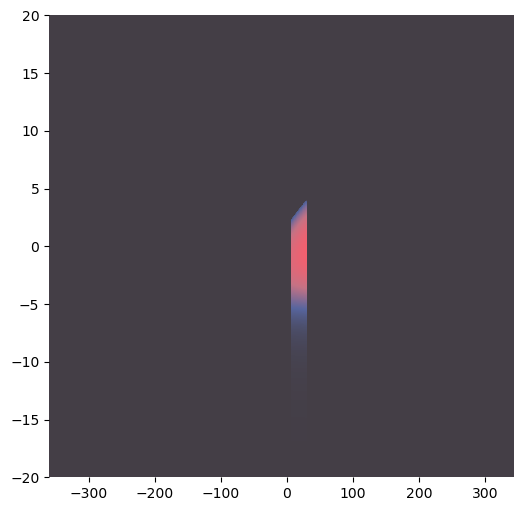

✅ Fichier enregistré sous : density_coupure_2_0.table
✅ Fichier enregistré sous : Pi_coupure_2_0.table
filename = 2025-01-27/theta_discr_exp_2_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz
✅ Fichier enregistré sous : rho_coupure_2_0.table


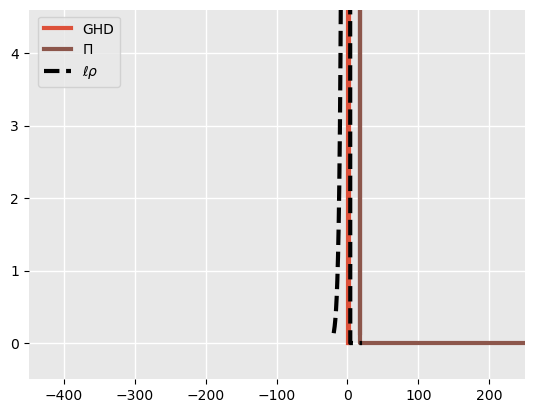

In [180]:
PI , GHD , N  = [] , [] , [] 
liste_t = np.array([0.000 , 1.000 , 10.000 , 11.000 , 20.000 , 21.000 , 30.000 ])
mask = (liste_t >= 0) & (liste_t <= 30)
mask = [ t in np.array([0.000]) for t in liste_t ]
print(mask)

##mat_nu_1 = np.array([
#        np.array([f_mat_nu_bord(v, theta , v1 = veff_bord_discr_exp_2 , v2 =  0.00001*theta_discr_exp +veff_bord_discr_exp_2[-1]   ) for theta in theta_discr_exp_2])
#        for v in veff_bord_discr_exp_2
#    ]) 

mat_rho = np.array([0.5 / np.pi * nu* mass/hbar* dress(gbar, theta_discr, nu, np.ones(len(theta_discr))) for nu in mat_nu ]  )

# theta_discr_exp
filename = f"{date}/theta_discr_exp_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
theta_discr_exp = np.load(filename)
Temps_exp = 30

for t in liste_t[mask] :
    filename = f"{date}/bord1_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print ( 'filename =' ,filename )
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    bord1 = np.load(filename)
    filename = f"{date}/bord2_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print ( 'filename =' ,filename )
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    bord2 = np.load(filename)

    save_as_tikz_table(bord1*Taille*8.63/max(veff_bord_discr*Temp_bord), theta_discr_exp*8.8/max(theta_discr), filename="bord_1_0.table")
    save_as_tikz_table(bord2*Taille*8.63/max(veff_bord_discr*Temp_bord), theta_discr_exp*8.8/max(theta_discr), filename="bord_2_0.table")
    
    veff_bord_discr_exp_2 = np.linspace(min(bord1[0] , bord2[0]) , max(bord2[-1] , bord1[-1]), 200)*Taille/Temp_bord
    theta_discr_exp_2 = np.linspace(theta_discr[0] , theta_discr[-1], 600)
    mat_nu_bord = np.array([
        np.array([f_mat_nu_bord(v, theta , v1 = bord1*Taille/Temp_bord , v2 = bord2*Taille/Temp_bord ) for theta in theta_discr_exp_2])
        for v in veff_bord_discr_exp_2
    ])  
    #vmin=0
    #vmax=1
    X0, Y0 = np.meshgrid(veff_bord_discr*Temp_bord, theta_discr)
    #plt.contourf( X0, Y0,   np.array([nu0 for v in veff_bord_discr]).T, cmap='viridis' , vmin=vmin, vmax=vmax , alpha = 0.3)
    #plt.contourf( X0, Y0,   mat_nu.T, cmap='viridis' , vmin=vmin, vmax=vmax , alpha = 0.3)
    X, Y = np.meshgrid(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2)
    #plt.contourf( X, Y,   mat_nu_bord.T, cmap='viridis' , vmin=vmin, vmax=vmax, alpha = 0.5)
    #plt.plot(veff_bord_discr*Temp_bord , theta_discr , label = "veff" )
    #plt.colorbar()  # Ajouter une barre de couleur pour l'échelle des valeurs
    #plt.show()

    #plt.plot(veff_bord_discr*Temp_bord , theta_veff_fun(veff_bord_discr) , label = "veff" )
    
    #plt.plot(bord1*Taille, theta_discr_exp)
    #plt.plot(bord2*Taille , theta_discr_exp)
    #plt.plot(np.concatenate([bord1, np.flip(bord2)] , axis=0)*Taille, np.concatenate([theta_discr_exp, np.flip(theta_discr_exp)], axis=0) , color = "white" , label = str(t) )
    
    #plt.vlines(x_1*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 - Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.vlines(x_2*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 + Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.xlim([0,2])
    #plt.xlabel(r"$\mu m$")
    #plt.ylabel(r"$\mu m/ms$")
    #plt.legend()
    #plt.show()

    fig, ax = plt.subplots(figsize=(8, 6))

    mat_rho_bord = np.array([0.5 / np.pi * nu* mass/hbar* dress(gbar, theta_discr_exp_2, nu, np.ones(len(theta_discr_exp_2))) for nu in mat_nu_bord ]  )
    nb_levels = 1000
    vmin, vmax = 0 , 5.6*Taille

    # Créer un graphique de contours
    #cf0 = ax.contourf(X0, Y0, mat_rho.T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=0.3)
    cf0 = ax.contourf(X0, Y0, np.array([np.zeros(len(nu0)) for v in veff_bord_discr]).T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)
    #cf0 = ax.contourf(X0, Y0, mat_rho.T*Taille, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=0.2)
    cf = ax.contourf( X, Y,   mat_rho_bord.T*Taille, cmap=custom_cmap , vmin=vmin, vmax=vmax , alpha = 1)

    # Supprimer les traits noirs autour de la figure
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Ajouter la barre de couleur avec 1 décimale
    cbar = plt.colorbar(cf, ax=ax, label=r'$\rho*\ell~ (ms/\mu m)$')
    cbar.outline.set_visible(False)
    cbar.formatter = FormatStrFormatter('%.1f')
    cbar.update_ticks()
    
    # Sauvegarder le graphique complet avec les axes et la colorbar
    fig.savefig(f"complete_graph_coupure_2_{t:.0f}.pdf", dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
    
    # Sauvegarder les axes sans le graphique ni la colorbar
    fig_axes, ax_axes = plt.subplots(figsize=(6, 6))
    #ax_axes.contourf(X0, Y0, mat_rho.T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=0.3)
    ax_axes.contourf(X0, Y0, np.array([np.zeros(len(nu0)) for v in veff_bord_discr]).T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)    
    #ax_axes.contourf(X0, Y0, mat_rho.T*Taille, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=0.2)    
    ax_axes.contourf(X, Y, mat_rho_bord.T*Taille, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)
    #ax_axes.set_axis_off()  # Masquer les axes
    # Supprimer les traits noirs autour de la figure
    for spine in ax_axes.spines.values():
        spine.set_visible(False)
    fig_axes.savefig(f"graph_coupure_2_{t:.0f}_only.pdf", dpi=300, bbox_inches='tight', transparent=True)

    #plt.plot(veff_bord_discr*Temp_bord , theta_discr , label = "veff" )
    #plt.colorbar()  # Ajouter une barre de couleur pour l'échelle des valeurs
    #plt.plot(np.concatenate([bord1, np.flip(bord2)], axis=0)*Taille, np.concatenate([theta_discr_exp, np.flip(theta_discr_exp)], axis=0) , color = "white" , label = str(t) )
    
    #plt.vlines(x_1*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 - Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.vlines(x_2*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 + Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.xlim([0,2])
    #plt.xlabel(r"$\mu m$")
    #plt.ylabel(r"$\mu m/ms$")
    #plt.legend()
    plt.show()





    #Pi = integral_axis1 = integ(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2, mat_rho_bord, axes=(0,))
    #Ghd = integral_axis1 = integ(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2, mat_rho_bord, axes=(1,))
    #nat = integral_axis1 = integ(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2, mat_rho_bord, axes=(0,1))

    #PI.append(Pi)
    #GHD.append(Ghd)
    #N.append(nat)

    #plt.plot(theta_discr_exp_2 , Pi , label = f"Pi : {t:.3f}") 
    #for i , rho in enumerate(mat_rho_bord) :
    #    plt.plot(theta_discr_exp_2 , rho , label = f"rho : {i:.3f}") 
    #plt.xlabel(r"$\mu m/ms$")
    #plt.ylabel(r"$ms/\mu m$")
    #plt.legend()
    #plt.show()

    #plt.plot(veff_bord_discr_exp_2 , Ghd , label = f"GHD : {t:.3f}") 
    #plt.xlabel(r"$\mu m/ms$")
    #plt.ylabel(r"${\mu m}^{-1}$")
    #plt.legend()
    #plt.show()

    #plt.plot(theta_discr_exp_2*liste_t[-1]+x0, PI[0]/liste_t[-1] , label = f"Pi : {0:.3f}") 
    #plt.plot(veff_bord_discr_exp_2*Temp_bord, Ghd , label = f"Ghd : {t:.3f}") 
    #plt.xlabel(r"$\mu m$")
    #plt.ylabel(r"${\mu m}^{-1}$")
    #plt.legend()
    #plt.show()

    
    fig, ax1 = plt.subplots()
    
    label = r"GHD"
    filename = f"{date}/density_expansion_nu_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    density = np.load(filename)    
    # Créer un nouvel intervalle allant de 0 à 400
    #x_new = np.linspace(max(density[0, :] * Taille) , 400, 100)  # 100 points entre 0 et 400
    #y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux
    # Concaténer avec tes données existantes
    x_combined = density[0, :] * Taille/Temp_bord # np.concatenate([density[0, :] * Taille  , x_new])
    y_combined = density[1, :]# np.concatenate([density[1, :] , y_new])

    save_as_tikz_table(x_combined*8.8/20, y_combined*5/56 , filename=f"density_coupure_2_{t:.0f}.table")
    
    ax1.plot(x_combined, y_combined, linewidth=3, color=plt.cm.inferno(0.6), alpha=1,
         label=label)
    
    label = r"$\Pi$"
    index_last_underscore = nom2.rfind('_')  # Trouver l'index du dernier underscore
       
    x_new = np.linspace(max(theta_discr_exp*t +x0) , 400, 100)  # 100 points entre 0 et 400
    y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux
    filename = f"{date}/Pi_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    Pi_0 = np.load(filename) * Taille
    # Concaténer avec tes données existantes
    x_combined = np.concatenate([theta_discr_exp*t +x0, x_new])
    y_combined = np.concatenate([Pi_0, y_new])

    save_as_tikz_table(x_combined*8.8/20, y_combined*5/56 , filename=f"Pi_coupure_2_{t:.0f}.table")
    
    ax1.plot(x_combined,  y_combined, linewidth=3, color="#8c564b",alpha=1, 
             label=label)

    
    label = r"$\ell\rho$"
    
    index_last_underscore = nom2.rfind('_')  # Trouver l'index du dernier underscore
    filename = f"{date}/rho_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
    filename = f"{date}/rho_bon_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    rho_theta_star_discr = np.load(filename)['arr_0']
    
    filename = f"{date}/theta_discr_exp_2_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
    #filename = '2025-01-27/theta_discr_exp_2_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz' 
    print ( 'filename =' ,filename )
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    theta_discr_exp_2 = np.load(filename)['arr_0']
       
    #theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
    theta0 =  x0/Temps_exp

    save_as_tikz_table((theta_discr_exp_2+theta0)*8.8/20, rho_theta_star_discr*Taille*5/56 , filename=f"rho_coupure_2_{t:.0f}.table")
    
    ax1.plot(theta_discr_exp_2+theta0, 
             rho_theta_star_discr*Taille , 
             linewidth=3 , 
             linestyle='--',
             alpha=1,
             color = "black",#"#bcbd22", 
             label=label)
    
    plt.ylim([-0.5 , 4.6 ])
    plt.xlim([-450, 250 ])    
    plt.grid(True)
    #plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    #plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    # Personnalisation de la légende
    ax1.legend(
        #loc='upper left',             # Position de la légende
        loc='upper left',
        #bbox_to_anchor=(0.3, 1),    # Ajuste la position avec un ancrage spécifique
        #loc='best', 
        bbox_to_anchor=(0.005, 1),
        #fancybox=False,                  # Ajouter une bordure arrondie
        #shadow=False,                    # Ajouter une ombre
        #ncol=1,                         # Nombre de colonnes pour les entrées de la légende
        #fontsize=police,                    # Taille de la police
        #framealpha=0.5,                 # Transparence du fond de la légende (0: transparent, 1: opaque)
        facecolor='#e8e8e8',                  # Couleur de fond de la légende
        #edgecolor='black',              # Couleur du bord de la légende
        #title='Légende de l\'expérience', # Titre de la légende
        #title_fontsize='large',         # Taille de la police du titre
        #labelspacing=0.1,               # Espacement entre les labels de la légende
        #handlelength=0.5,               # Longueur des poignées des items de la légende
        #handleheight=1.5,               # Hauteur des poignées des items de la légende
        #columnspacing=0,               # Espacement entre les colonnes
        #alignment = 'right',
    )
    plt.grid(color='white', linestyle='-', linewidth=1)
    # Rendre le cadre invisible
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    # Appliquer un fond gris
    #plt.gca().set_facecolor('lightgray')  # Fond gris pour le canevas
    
    
    # Appliquer un fond gris clair au graphe
    #plt.gca().set_facecolor('#f0f0f0')  # Fond gris très clair (hex pour personnalisation)
    plt.gca().set_facecolor('#e8e8e8')  # Fond gris plus foncé
    plt.savefig('Figures/article_distribution_24-04-2024.pdf', bbox_inches='tight', dpi = 300)
    plt.savefig('Figures/article_distribution_24-04-2024.svg', bbox_inches='tight', dpi = 300)
    plt.show()

[False, False, False, False, False, False, True]
filename = 2025-01-27/bord1_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_30.000.npz
filename = 2025-01-27/bord2_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_30.000.npz
✅ Fichier enregistré sous : bord_1_30.table
✅ Fichier enregistré sous : bord_2_30.table


Locator attempting to generate 1001 ticks ([-9.999999999999999e-14, ..., 1e-13]), which exceeds Locator.MAXTICKS (1000).


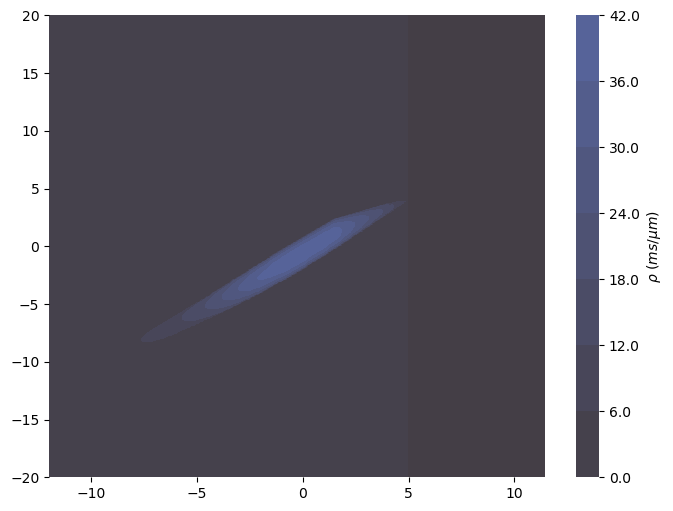

Locator attempting to generate 1001 ticks ([-9.999999999999999e-14, ..., 1e-13]), which exceeds Locator.MAXTICKS (1000).


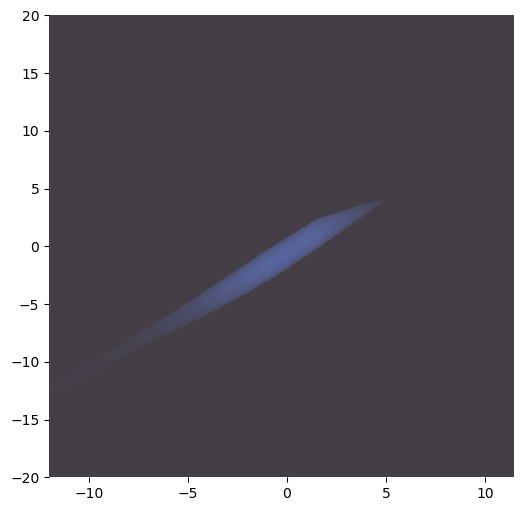

✅ Fichier enregistré sous : density_coupure_2_30.table
✅ Fichier enregistré sous : Pi_coupure_2_30.table
max Pi 106.7446501688187
filename = 2025-01-27/theta_discr_exp_2_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz
✅ Fichier enregistré sous : rho_coupure_2_30.table


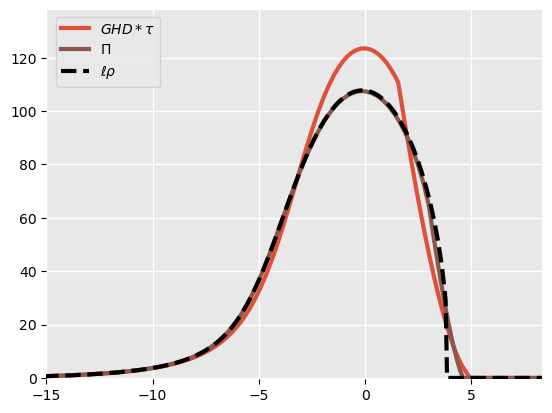

In [186]:
PI , GHD , N  = [] , [] , [] 
liste_t = np.array([0.000 , 1.000 , 10.000 , 11.000 , 20.000 , 21.000 , 30.000 ])
mask = (liste_t >= 0) & (liste_t <= 30)
mask = [ t in np.array([ 30.000]) for t in liste_t ]
print(mask)

##mat_nu_1 = np.array([
#        np.array([f_mat_nu_bord(v, theta , v1 = veff_bord_discr_exp_2 , v2 =  0.00001*theta_discr_exp +veff_bord_discr_exp_2[-1]   ) for theta in theta_discr_exp_2])
#        for v in veff_bord_discr_exp_2
#    ]) 

mat_rho = np.array([0.5 / np.pi * nu* mass/hbar* dress(gbar, theta_discr, nu, np.ones(len(theta_discr))) for nu in mat_nu ]  )

# theta_discr_exp
filename = f"{date}/theta_discr_exp_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
theta_discr_exp = np.load(filename)
Temps_exp = 30

for t in liste_t[mask] :
    filename = f"{date}/bord1_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print ( 'filename =' ,filename )
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    bord1 = np.load(filename)
    filename = f"{date}/bord2_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print ( 'filename =' ,filename )
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    bord2 = np.load(filename)

    save_as_tikz_table(bord1*Taille/t*8.63/max(veff_bord_discr*Temp_bord/t), theta_discr_exp*8.8/max(theta_discr), filename=f"bord_1_{t:.0f}.table")
    save_as_tikz_table(bord2*Taille/t*8.63/max(veff_bord_discr*Temp_bord/t), theta_discr_exp*8.8/max(theta_discr), filename=f"bord_2_{t:.0f}.table")
    
    
    veff_bord_discr_exp_2 = np.linspace(min(bord1[0] , bord2[0]) , max(bord2[-1] , bord1[-1]), 200)*Taille/Temp_bord
    theta_discr_exp_2 = np.linspace(theta_discr[0] , theta_discr[-1], 600)
    mat_nu_bord = np.array([
        np.array([f_mat_nu_bord(v, theta , v1 = bord1*Taille/Temp_bord , v2 = bord2*Taille/Temp_bord ) for theta in theta_discr_exp_2])
        for v in veff_bord_discr_exp_2
    ])  
    #vmin=0
    #vmax=1
    X0, Y0 = np.meshgrid(veff_bord_discr*Temp_bord/t, theta_discr)
    #plt.contourf( X0, Y0,   np.array([nu0 for v in veff_bord_discr]).T, cmap='viridis' , vmin=vmin, vmax=vmax , alpha = 0.3)
    #plt.contourf( X0, Y0,   mat_nu.T, cmap='viridis' , vmin=vmin, vmax=vmax , alpha = 0.3)
    X, Y = np.meshgrid(veff_bord_discr_exp_2*Temp_bord/t, theta_discr_exp_2)
    #plt.contourf( X, Y,   mat_nu_bord.T, cmap='viridis' , vmin=vmin, vmax=vmax, alpha = 0.5)
    #plt.plot(veff_bord_discr*Temp_bord , theta_discr , label = "veff" )
    #plt.colorbar()  # Ajouter une barre de couleur pour l'échelle des valeurs
    #plt.show()

    #plt.plot(veff_bord_discr*Temp_bord , theta_veff_fun(veff_bord_discr) , label = "veff" )
    
    #plt.plot(bord1*Taille, theta_discr_exp)
    #plt.plot(bord2*Taille , theta_discr_exp)
    #plt.plot(np.concatenate([bord1, np.flip(bord2)] , axis=0)*Taille, np.concatenate([theta_discr_exp, np.flip(theta_discr_exp)], axis=0) , color = "white" , label = str(t) )
    
    #plt.vlines(x_1*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 - Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.vlines(x_2*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 + Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.xlim([0,2])
    #plt.xlabel(r"$\mu m$")
    #plt.ylabel(r"$\mu m/ms$")
    #plt.legend()
    #plt.show()

    fig, ax = plt.subplots(figsize=(8, 6))

    mat_rho_bord = np.array([0.5 / np.pi * nu* mass/hbar* dress(gbar, theta_discr_exp_2, nu, np.ones(len(theta_discr_exp_2))) for nu in mat_nu_bord ]  )
    nb_levels = 1000
    vmin, vmax = 0 , 5.6*Taille

    # Créer un graphique de contours
    #cf0 = ax.contourf(X0, Y0, mat_rho.T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=0.3)
    cf0 = ax.contourf(X0, Y0, np.array([np.zeros(len(nu0)) for v in veff_bord_discr]).T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)
    cf = ax.contourf( X, Y,   mat_rho_bord.T*Taille, cmap=custom_cmap , vmin=vmin, vmax=vmax , alpha = 1)
    ax.set_xlim(min(veff_bord_discr*Temp_bord/t), max(veff_bord_discr*Temp_bord/t))
    # Supprimer les traits noirs autour de la figure
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Ajouter la barre de couleur avec 1 décimale
    cbar = plt.colorbar(cf, ax=ax, label=r'$\rho~ (ms/\mu m)$')
    cbar.outline.set_visible(False)
    cbar.formatter = FormatStrFormatter('%.1f')
    cbar.update_ticks()
    
    # Sauvegarder le graphique complet avec les axes et la colorbar
    fig.savefig(f"complete_graph_coupure_2_{t:.0f}.pdf", dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
    
    # Sauvegarder les axes sans le graphique ni la colorbar
    fig_axes, ax_axes = plt.subplots(figsize=(6, 6))
    #ax_axes.contourf(X0, Y0, mat_rho.T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=0.3)
    ax_axes.contourf(X0, Y0, np.array([np.zeros(len(nu0)) for v in veff_bord_discr]).T, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)    
    ax_axes.contourf(X, Y, mat_rho_bord.T*Taille, levels=nb_levels, cmap=custom_cmap, vmin=vmin, vmax=vmax, alpha=1)
    ax_axes.set_xlim(min(veff_bord_discr*Temp_bord/t), max(veff_bord_discr*Temp_bord/t))
    #ax_axes.set_axis_off()  # Masquer les axes
    # Supprimer les traits noirs autour de la figure
    for spine in ax_axes.spines.values():
        spine.set_visible(False)
    fig_axes.savefig(f"graph_coupure_2_{t:.0f}_only.pdf", dpi=300, bbox_inches='tight', transparent=True)

    #plt.plot(veff_bord_discr*Temp_bord , theta_discr , label = "veff" )
    #plt.colorbar()  # Ajouter une barre de couleur pour l'échelle des valeurs
    #plt.plot(np.concatenate([bord1, np.flip(bord2)], axis=0)*Taille, np.concatenate([theta_discr_exp, np.flip(theta_discr_exp)], axis=0) , color = "white" , label = str(t) )
    
    #plt.vlines(x_1*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 - Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.vlines(x_2*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 + Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.xlim([0,2])
    #plt.xlabel(r"$\mu m$")
    #plt.ylabel(r"$\mu m/ms$")
    #plt.legend()
    plt.show()





    #Pi = integral_axis1 = integ(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2, mat_rho_bord, axes=(0,))
    #Ghd = integral_axis1 = integ(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2, mat_rho_bord, axes=(1,))
    #nat = integral_axis1 = integ(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2, mat_rho_bord, axes=(0,1))

    #PI.append(Pi)
    #GHD.append(Ghd)
    #N.append(nat)

    #plt.plot(theta_discr_exp_2 , Pi , label = f"Pi : {t:.3f}") 
    #for i , rho in enumerate(mat_rho_bord) :
    #    plt.plot(theta_discr_exp_2 , rho , label = f"rho : {i:.3f}") 
    #plt.xlabel(r"$\mu m/ms$")
    #plt.ylabel(r"$ms/\mu m$")
    #plt.legend()
    #plt.show()

    #plt.plot(veff_bord_discr_exp_2 , Ghd , label = f"GHD : {t:.3f}") 
    #plt.xlabel(r"$\mu m/ms$")
    #plt.ylabel(r"${\mu m}^{-1}$")
    #plt.legend()
    #plt.show()

    #plt.plot(theta_discr_exp_2*liste_t[-1]+x0, PI[0]/liste_t[-1] , label = f"Pi : {0:.3f}") 
    #plt.plot(veff_bord_discr_exp_2*Temp_bord, Ghd , label = f"Ghd : {t:.3f}") 
    #plt.xlabel(r"$\mu m$")
    #plt.ylabel(r"${\mu m}^{-1}$")
    #plt.legend()
    #plt.show()


    fig, ax1 = plt.subplots()
    
    label = r"$GHD*\tau$"
    filename = f"{date}/density_expansion_nu_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    density = np.load(filename)    
    # Créer un nouvel intervalle allant de 0 à 400
    x_new = np.linspace(max(density[0, :] * Taille) , 400, 100)  # 100 points entre 0 et 400
    y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux
    # Concaténer avec tes données existantes
    x_combined = np.concatenate([density[0, :] * Taille/t, x_new/t])
    y_combined = np.concatenate([density[1, :]*t, y_new*t])

    save_as_tikz_table(x_combined*8.8/20, y_combined*5/(max(Pi)) , filename=f"density_coupure_2_{t:.0f}.table")
    
    ax1.plot(x_combined, y_combined, linewidth=3, color=plt.cm.inferno(0.6), alpha=1,
         label=label)
    
    label = r"$\Pi$"
    index_last_underscore = nom2.rfind('_')  # Trouver l'index du dernier underscore
       
    x_new = np.linspace(max(theta_discr_exp*t +x0) , 400, 100)  # 100 points entre 0 et 400
    y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux
    filename = f"{date}/Pi_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    Pi_0 = np.load(filename) * Taille
    # Concaténer avec tes données existantes
    x_combined = np.concatenate([theta_discr_exp +x0/t, x_new/t])
    y_combined = np.concatenate([Pi_0, y_new])

    save_as_tikz_table(x_combined*8.8/20, y_combined*5/(max(Pi)) , filename=f"Pi_coupure_2_{t:.0f}.table")
    
    ax1.plot(x_combined,  y_combined, linewidth=3, color="#8c564b",alpha=1, 
             label=label)

    print("max Pi" , max(Pi))

    
    label = r"$\ell\rho$"
    
    index_last_underscore = nom2.rfind('_')  # Trouver l'index du dernier underscore
    filename = f"{date}/rho_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
    filename = f"{date}/rho_bon_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    rho_theta_star_discr = np.load(filename)['arr_0']
    
    filename = f"{date}/theta_discr_exp_2_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
    #filename = '2025-01-27/theta_discr_exp_2_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz' 
    print ( 'filename =' ,filename )
    #sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
    theta_discr_exp_2 = np.load(filename)['arr_0']
       
    #theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
    theta0 =  x0/t

    save_as_tikz_table((theta_discr_exp_2+theta0)*8.8/20, rho_theta_star_discr*Taille*5/(max(Pi)) , filename=f"rho_coupure_2_{t:.0f}.table")
    
    ax1.plot((theta_discr_exp_2+theta0), 
             rho_theta_star_discr*Taille , 
             linewidth=3 , 
             linestyle='--',
             alpha=1,
             color = "black",#"#bcbd22", 
             label=label)
    
    plt.ylim([-0.5 , 4.6*t ])
    plt.xlim([-450/t, 250/t ])    
    plt.grid(True)
    #plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    #plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    # Personnalisation de la légende
    ax1.legend(
        #loc='upper left',             # Position de la légende
        loc='upper left',
        #bbox_to_anchor=(0.3, 1),    # Ajuste la position avec un ancrage spécifique
        #loc='best', 
        bbox_to_anchor=(0.005, 1),
        #fancybox=False,                  # Ajouter une bordure arrondie
        #shadow=False,                    # Ajouter une ombre
        #ncol=1,                         # Nombre de colonnes pour les entrées de la légende
        #fontsize=police,                    # Taille de la police
        #framealpha=0.5,                 # Transparence du fond de la légende (0: transparent, 1: opaque)
        facecolor='#e8e8e8',                  # Couleur de fond de la légende
        #edgecolor='black',              # Couleur du bord de la légende
        #title='Légende de l\'expérience', # Titre de la légende
        #title_fontsize='large',         # Taille de la police du titre
        #labelspacing=0.1,               # Espacement entre les labels de la légende
        #handlelength=0.5,               # Longueur des poignées des items de la légende
        #handleheight=1.5,               # Hauteur des poignées des items de la légende
        #columnspacing=0,               # Espacement entre les colonnes
        #alignment = 'right',
    )
    plt.grid(color='white', linestyle='-', linewidth=1)
    # Rendre le cadre invisible
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    # Appliquer un fond gris
    #plt.gca().set_facecolor('lightgray')  # Fond gris pour le canevas
    
    
    # Appliquer un fond gris clair au graphe
    #plt.gca().set_facecolor('#f0f0f0')  # Fond gris très clair (hex pour personnalisation)
    plt.gca().set_facecolor('#e8e8e8')  # Fond gris plus foncé
    plt.savefig('Figures/article_distribution_24-04-2024.pdf', bbox_inches='tight', dpi = 300)
    plt.savefig('Figures/article_distribution_24-04-2024.svg', bbox_inches='tight', dpi = 300)
    plt.show()

🚀 Exécution : sshpass -p "Cedt,ll?" rsync -ah --progress -u "isabelle.bouchoule@10.117.49.59:/home/isabelle.bouchoule/Puce/analysedata/analyses_jupyter/analyses_Guillaume/Bord/2025-01-27/theta_discr_exp_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz" "/Users/themezeguillaume/Desktop/Scroll_Web/quantum-mechanics-thesis-main/Domain_Wall_Dynamics_for_a_1D_Bose_ga/Figures/data/2025-01-27/theta_discr_exp_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz"
receiving file list ... 
1 file to consider

sent 16 bytes  received 183 bytes  132.67 bytes/sec
total size is 1.68K  speedup is 8.44
🚀 Exécution : sshpass -p "Cedt,ll?" rsync -ah --progress -u "isabelle.bouchoule@10.117.49.59:/home/isabelle.bouchoule/Puce/analysedata/analyses_jupyter/analyses_Guillaume/Bord/2025-01-27/density_expansion_nu_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_30.000.npz" "/Users/themezeguillaume/Desktop/Scroll_Web/quantum-mechanics-thesis-main/Domain_Wall_Dynamics_for_a_1D_Bose_ga/Figures/data/

NameError: name 'police' is not defined

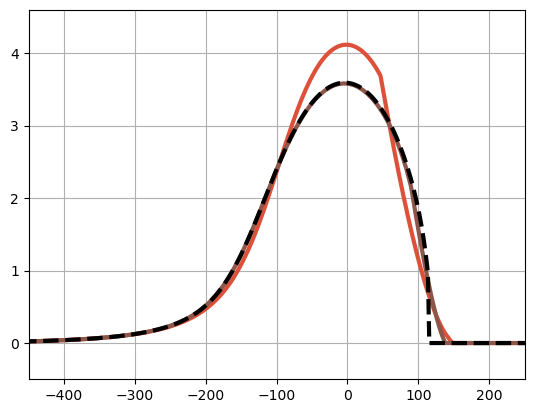

In [104]:
# theta_discr_exp
filename = f"{date}/theta_discr_exp_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
theta_discr_exp = np.load(filename)
Temps_exp = 30
fig, ax1 = plt.subplots()

# densité
filename = f"{date}/density_expansion_nu_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{Temps_exp:.3f}.npz"
sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
density = np.load(filename)     
label = r"GHD"
# Créer un nouvel intervalle allant de 0 à 400
x_new = np.linspace(max(density[0, :] * Taille) , 400, 100)  # 100 points entre 0 et 400
y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux
# Concaténer avec tes données existantes
x_combined = np.concatenate([density[0, :] * Taille, x_new])
y_combined = np.concatenate([density[1, :], y_new])   
ax1.plot(x_combined, y_combined, linewidth=3, color=plt.cm.inferno(0.6), alpha=1,
     label=label)

#ax1.plot(X[mask], Y[mask], label=f"donnés du "+ date_donnees + ' : ' + label )
index_last_underscore = nom2.rfind('_')  # Trouver l'index du dernier underscore

label = r"$\Pi/\tau$"
x_new = np.linspace(max(theta_discr_exp*Temps_exp +x0) , 400, 100)  # 100 points entre 0 et 400
y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux
filename = f"{date}/Pi_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
Pi_0 = np.load(filename) * Taille
# Concaténer avec tes données existantes
x_combined = np.concatenate([theta_discr_exp*Temps_exp +x0, x_new])
y_combined = np.concatenate([Pi_0/Temps_exp, y_new])
ax1.plot(x_combined,  y_combined, linewidth=3, color="#8c564b",alpha=1, 
         label=label)


index_last_underscore = nom2.rfind('_')  # Trouver l'index du dernier underscore
filename = f"{date}/rho_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
filename = f"{date}/rho_bon_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
rho_theta_star_discr = np.load(filename)['arr_0']

filename = f"{date}/theta_discr_exp_2_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
#filename = '2025-01-27/theta_discr_exp_2_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz' 
print ( 'filename =' ,filename )
sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
theta_discr_exp_2 = np.load(filename)['arr_0']

label = r"$\ell\rho/\tau$"


#theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
theta0 =  x0/Temps_exp

ax1.plot((theta_discr_exp_2+theta0)*Temps_exp, 
         rho_theta_star_discr/Temps_exp*Taille , 
         linewidth=3 , 
         linestyle='--',
         alpha=1,
         color = "black",#"#bcbd22", 
         label=label)

plt.ylim([-0.5 , 4.6 ])
plt.xlim([-450, 250 ])    
plt.grid(True)
#plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
#plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
# Personnalisation de la légende
ax1.legend(
    #loc='upper left',             # Position de la légende
    loc='upper left',
    #bbox_to_anchor=(0.3, 1),    # Ajuste la position avec un ancrage spécifique
    #loc='best', 
    bbox_to_anchor=(0.005, 1),
    #fancybox=False,                  # Ajouter une bordure arrondie
    #shadow=False,                    # Ajouter une ombre
    #ncol=1,                         # Nombre de colonnes pour les entrées de la légende
    fontsize=police,                    # Taille de la police
    #framealpha=0.5,                 # Transparence du fond de la légende (0: transparent, 1: opaque)
    facecolor='#e8e8e8',                  # Couleur de fond de la légende
    #edgecolor='black',              # Couleur du bord de la légende
    #title='Légende de l\'expérience', # Titre de la légende
    #title_fontsize='large',         # Taille de la police du titre
    #labelspacing=0.1,               # Espacement entre les labels de la légende
    #handlelength=0.5,               # Longueur des poignées des items de la légende
    #handleheight=1.5,               # Hauteur des poignées des items de la légende
    #columnspacing=0,               # Espacement entre les colonnes
    #alignment = 'right',
)
plt.grid(color='white', linestyle='-', linewidth=1)
# Rendre le cadre invisible
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Appliquer un fond gris
#plt.gca().set_facecolor('lightgray')  # Fond gris pour le canevas


# Appliquer un fond gris clair au graphe
#plt.gca().set_facecolor('#f0f0f0')  # Fond gris très clair (hex pour personnalisation)
plt.gca().set_facecolor('#e8e8e8')  # Fond gris plus foncé
plt.savefig('Figures/article_distribution_24-04-2024.pdf', bbox_inches='tight', dpi = 300)
plt.savefig('Figures/article_distribution_24-04-2024.svg', bbox_inches='tight', dpi = 300)
plt.show()

🚀 Exécution : sshpass -p "Cedt,ll?" rsync -ah --progress -u "isabelle.bouchoule@10.117.49.59:/home/isabelle.bouchoule/Puce/analysedata/analyses_jupyter/analyses_Guillaume/Bord/2024-04-24/Donnees/Y_coupure2_1ms.txt" "/Users/themezeguillaume/Desktop/Scroll_Web/quantum-mechanics-thesis-main/These_Memoire/BiPart/Figures/data/2024-04-24/Donnees/Y_coupure2_1ms.txt"
receiving file list ... 
1 file to consider

sent 16 bytes  received 128 bytes  57.60 bytes/sec
total size is 17.83K  speedup is 123.84
🚀 Exécution : sshpass -p "Cedt,ll?" rsync -ah --progress -u "isabelle.bouchoule@10.117.49.59:/home/isabelle.bouchoule/Puce/analysedata/analyses_jupyter/analyses_Guillaume/Bord/2024-04-24/Donnees/Y_coupure2_30ms.txt" "/Users/themezeguillaume/Desktop/Scroll_Web/quantum-mechanics-thesis-main/These_Memoire/BiPart/Figures/data/2024-04-24/Donnees/Y_coupure2_30ms.txt"
receiving file list ... 
1 file to consider

sent 16 bytes  received 129 bytes  96.67 bytes/sec
total size is 17.61K  speedup is 121.48


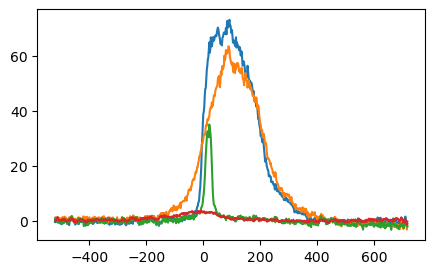

In [157]:
# Données

date_donnees = '2024-04-24'


fichier_x = "X_coupure1_1ms.txt"
filename = f"{date_donnees}/Donnees/{fichier_x}"
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
X_1_1 = np.loadtxt(filename)
fichier_y = "Y_coupure1_1ms.txt"
filename = f"{date_donnees}/Donnees/{fichier_y}"
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
Y_1_1 = np.loadtxt(filename)
plt.plot(X_1_1 , Y_1_1)

fichier_x = "X_coupure1_18ms.txt"
filename = f"{date_donnees}/Donnees/{fichier_x}"
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
X_1_18 = np.loadtxt(filename)
fichier_y = "Y_coupure1_18ms.txt"
filename = f"{date_donnees}/Donnees/{fichier_y}"
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
Y_1_18 = np.loadtxt(filename)
plt.plot(X_1_18 , Y_1_18)

fichier_x = "X_coupure2_1ms.txt"
filename = f"{date_donnees}/Donnees/{fichier_x}"
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
X_2_1 = np.loadtxt(filename)
fichier_y = "Y_coupure2_1ms.txt"
filename = f"{date_donnees}/Donnees/{fichier_y}"
sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
Y_2_1 = np.loadtxt(filename)
plt.plot(X_2_1 , Y_2_1)

fichier_x = "X_coupure2_30ms.txt"       
filename = f"{date_donnees}/Donnees/{fichier_x}"
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
X_2_30 = np.loadtxt(filename)
fichier_y = "Y_coupure2_30ms.txt"
filename = f"{date_donnees}/Donnees/{fichier_y}"
sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
Y_2_30 = np.loadtxt(filename)
plt.plot(X_2_30 , Y_2_30)

In [158]:
import numpy as np
import matplotlib.pyplot as plt

def norme(x , p ):
    if p == 0 : return float('inf') if any (el != 0 for el in x ) else 0
    elif p == float('inf') : return np.max(np.abs(x))
    else : return np.power(np.sum(np.power(np.abs(x),p)), 1/p)

def chi_squared_and_plot(x, y, x0, sigma=None):
    """
    Fonction pour calculer le chi² entre n(x) et n(-(x - x0)) et tracer les deux fonctions.

    Arguments:
    - x: liste ou tableau des valeurs de x.
    - y: liste ou tableau des valeurs n(x) associées à chaque x.
    - x0: décalage pour la transformation de x vers -(x - x0).
    - sigma: incertitude sur y (optionnel). Si non fourni, une incertitude de 1 est supposée.

    Retourne:
    - La valeur du chi².
    """

    # Fonction d'interpolation de n(x) (renvoie 0 si x est en dehors des bornes)
    def n(x_val):
        if x_val < min(x):
            return y[0]  # Retourne 0 si x est hors des bornes
        elif x_val > max(x):
            return y[-1]

        from scipy.interpolate import CubicSpline

        # Créer l'interpolateur spline cubique
        spline = CubicSpline(x, y)

        # Générer des points à interpoler
        y_new = spline(x_val)
        return y_new#np.interp(x_val, x, y)  # Interpolation linéaire

    # Calcul des différences entre n(x) et n(-(x - x0))
    #diff = [(n(xi-x0) - n(-xi - x0)) for xi in x]
    #n_x = [n(xi)for xi in x]
    n_x_minus_x0 = [n(xi-x0)for xi in x]
    #n_neg_x_plus_x0 = [n(-(xi-x0))for xi in x]
    n_neg_x_minus_x0 = [n(-xi-x0)for xi in x]

    n_neg_x_minus_x0 = [item if isinstance(item, np.float64) else item.item() for item in n_neg_x_minus_x0]
    n_x_minus_x0 = [item if isinstance(item, np.float64) else item.item() for item in n_x_minus_x0]

    n_s = (np.array(n_x_minus_x0) + np.array(n_neg_x_minus_x0))/2
    n_a = (np.array(n_x_minus_x0) - np.array(n_neg_x_minus_x0))/2

    #print (n_x_minus_x0 )

    # Vérification de la taille des deux listes et de leurs types
    #print(f"\nType et taille des listes :")
    #print(f"n_x_minus_x0 : type = {type(n_x_minus_x0)}, taille = {len(n_x_minus_x0)}")
    #print(f"n_neg_x_minus_x0 : type = {type(n_neg_x_minus_x0)}, taille = {len(n_neg_x_minus_x0)}")


    # Vérification de la présence de NaN dans les deux listes
    #if np.any(np.isnan(n_x_minus_x0)):
    #    print("La liste n_x_minus_x0 contient des NaN.")
    #else:
    #    print("La liste n_x_minus_x0 ne contient pas de NaN.")
    
    #if np.any(np.isnan(n_neg_x_minus_x0)):
    #    print("La liste n_neg_x_minus_x0 contient des NaN.")
    #else:
    #    print("La liste n_neg_x_minus_x0 ne contient pas de NaN.")
    
    # Vérification de la taille des deux listes
    #if len(n_x_minus_x0) == len(n_neg_x_minus_x0):
    #    print(f"Les deux listes ont la même taille : {len(n_x_minus_x0)} éléments.")
    #else:
    #    print(f"Les listes ont des tailles différentes : n_x_minus_x0 = {len(n_x_minus_x0)}, n_neg_x_minus_x0 = {len(n_neg_x_minus_x0)}.")
    
    # Si les tailles sont égales, on peut calculer la différence
    #if len(n_x_minus_x0) == len(n_neg_x_minus_x0):
    #    diff = np.array(n_x_minus_x0) - np.array(n_neg_x_minus_x0)
    #    print(f"Différence calculée avec {len(diff)} éléments.")
    #else:
    #    print("Les tailles des listes ne correspondent, donc la différence ne peut pas être calculée.")

    diff = np.array(n_x_minus_x0) - np.array(n_neg_x_minus_x0)

    # Calcul de chi²
    if sigma is None:sigma = np.ones_like(y)  # Si sigma n'est pas spécifié, on prend une incertitude de 1

    #chi2 = np.sum((np.array(diff) ** 2) / (np.array(sigma) ** 2))
    #chi2 = np.sum((np.array(diff) ** 2) / (np.array(n_x_minus_x0) ** 2))
    chi2 = norme(diff/2, 2)/norme(n_x_minus_x0 , 2)
    
    
    # Tracé des deux fonctions : n(x - x0) et n(-(x - x0))
    x_vals = x
    #x_vals = np.linspace(min(x) - 1, max(x) + 1, 500)  # Création d'une plage x fine pour le tracé

    # Calcul des valeurs n(x - x0) et n(-(x - x0)) pour chaque x
    #n_x = [n(xv) for xv in x_vals]
    #n_x_minus_x0 = [n(xv - x0) for xv in x_vals]
    #n_neg_x_plus_x0 = [n(-(xv - x0)) for xv in x_vals]

    # Tracé des deux courbes
    plt.figure(figsize=(8, 6))
    #plt.plot(x_vals, n_x, label=r'$n(x)$', color='blue')
    plt.plot(x_vals, n_x_minus_x0, label=r'$n(x - x_0)$', color='blue' ,linewidth=1, alpha=0.5 )
    #plt.plot(x_vals, n_neg_x_plus_x0, label=r'$n(-(x - x_0))$', color='red', linestyle='--')
    plt.plot(x_vals, n_neg_x_minus_x0, label=r'$n(-(x + x_0))$', color='red' , linewidth=1, alpha=0.5)
    plt.plot(x_vals, n_s, label=r'$n_s(x - x_0)$', color='magenta', linestyle='-' , linewidth=3)
    plt.plot(x_vals, n_a, label=r'$n_a(x - x_0)$', color='grey', linestyle='-' , linewidth=3)
    #plt.scatter(x, y, color='black', label='Données originales')
    plt.title(f'Comparaison entre n(x - x0) et n(-(x - x0)) pour x0 = {x0} , et chi2 = {chi2}')
    plt.axvline(x=x0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('n(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

    return chi2

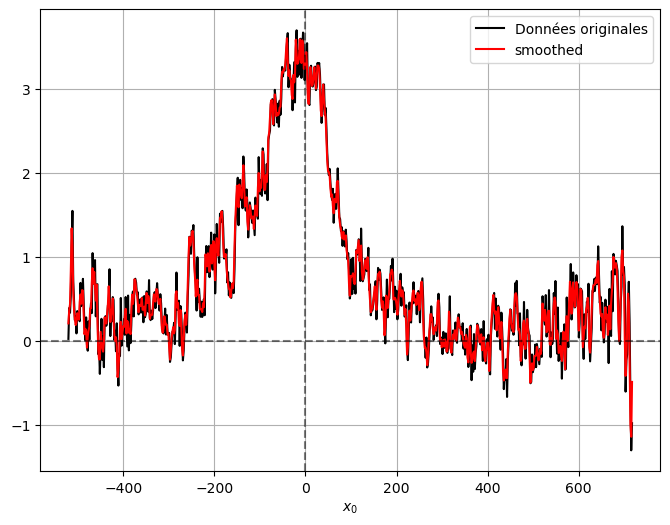

In [159]:
# il faut lisser sinom beaucoup d'extremum 
X , Y  = X_2_30 , Y_2_30 
window_size = 2
y_smoothed = np.convolve(Y, np.ones(window_size)/window_size, mode='same')
plt.figure(figsize=(8, 6))

plt.plot(X, Y, color='black', label='Données originales')
plt.plot(X, y_smoothed, label=f'smoothed', color='red' , linewidth=1.5 )
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.xlabel('$x_0$')
plt.legend()
plt.grid(True)
plt.show()

2024-04-24


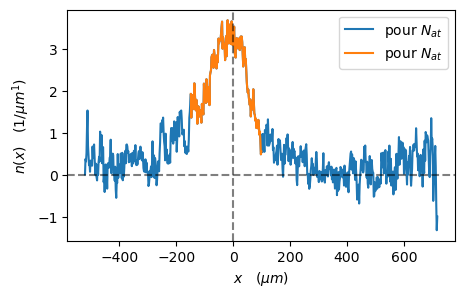

In [160]:
print(date_donnees)
if date_donnees == '2024-02-09': mask = (X > -200) & (X < 50)
elif date_donnees == '2024-02-29': 
    mask = (X > -220) & (X < 20)
    MASK = (X>0)*(X<150) 
    p0 =  117 # Estimation initiale pour x0
elif date_donnees == '2024-04-24': 
    mask = (X > -150) & (X < 100)
    MASK = (X>10)*(X<20) 
    p0 =  -14 # Estimation initiale pour x0
plt.plot ( X , Y , label = "pour $N_{at}$")
plt.plot ( X[mask] , Y[mask] , label = "pour $N_{at}$")
plt.xlabel(r"$x \quad (\mu m)$")  # Label de l'axe des X (avec notation LaTeX)
plt.ylabel(r"$n(x) \quad (1/\mu m^1)$")  # Label de l'axe des Y (avec notation LaTeX)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.legend()
plt.show()

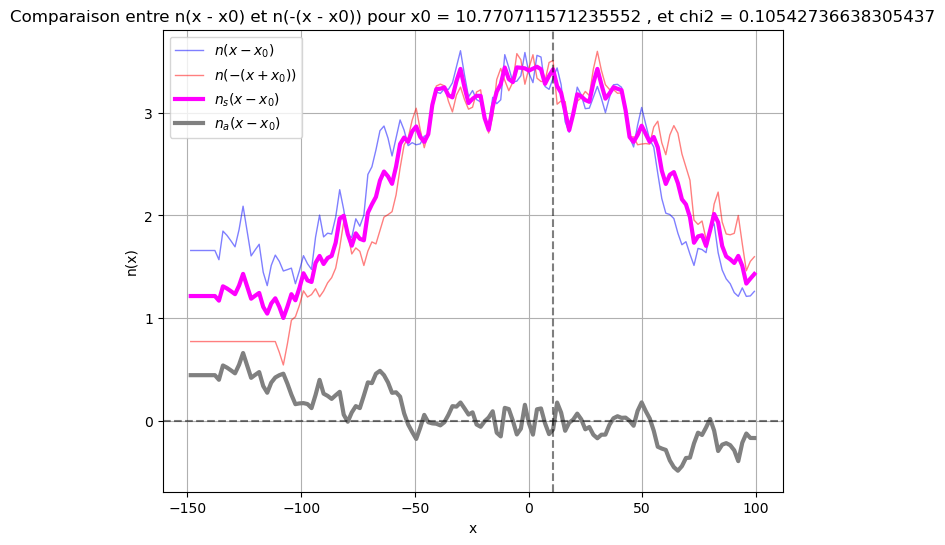

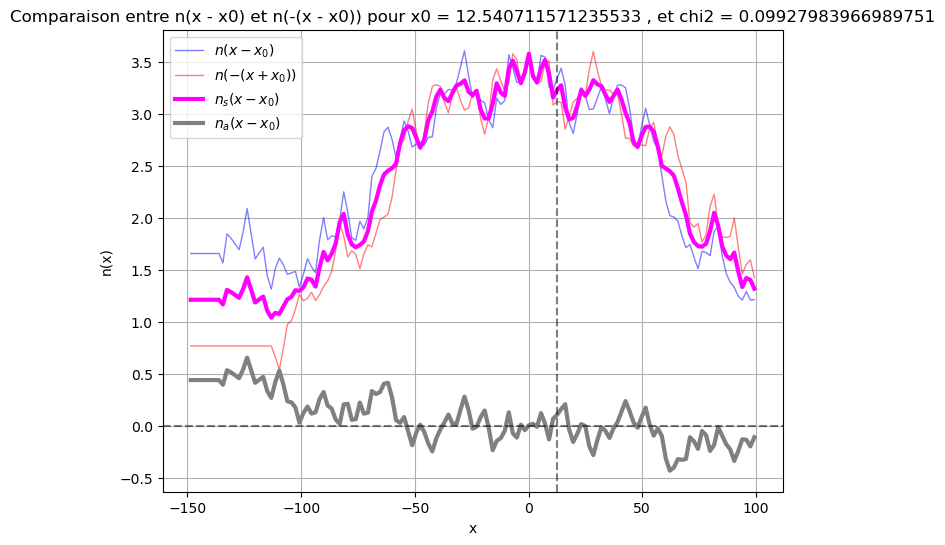

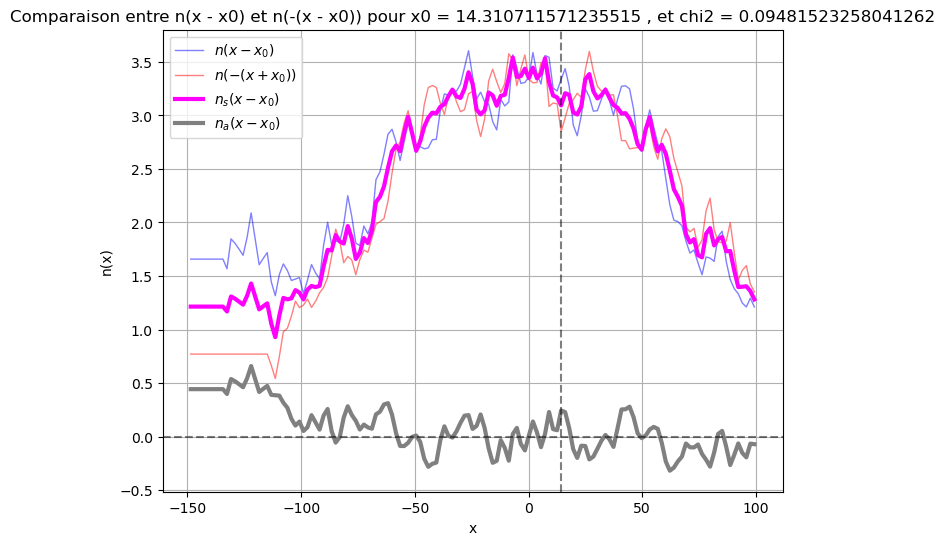

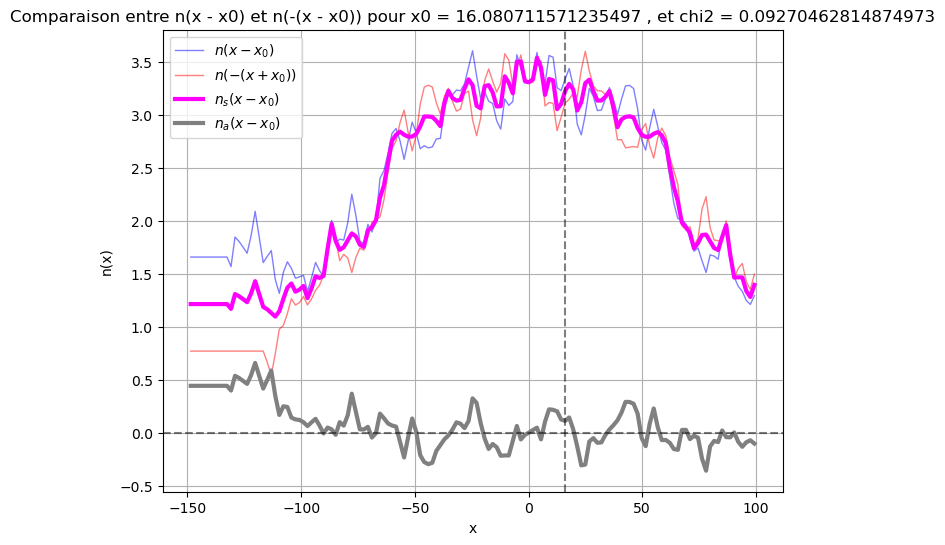

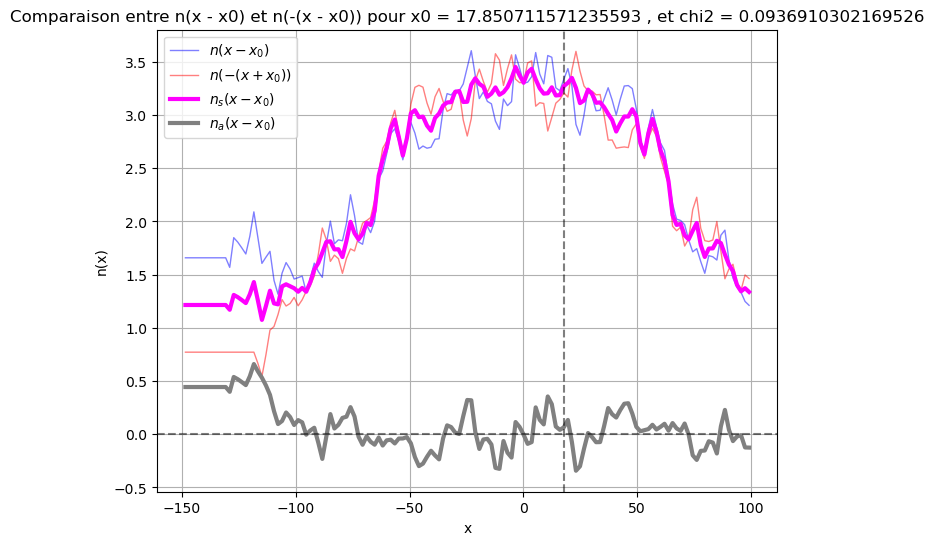

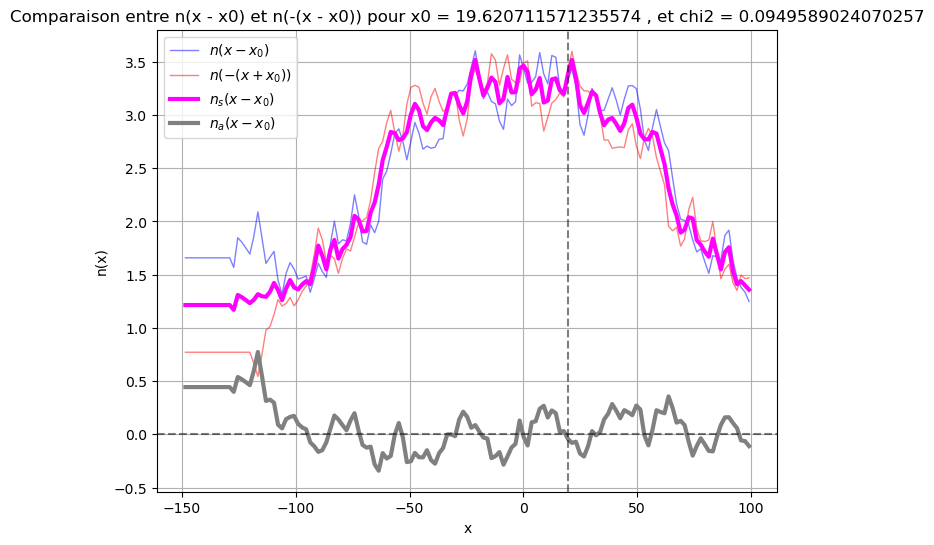

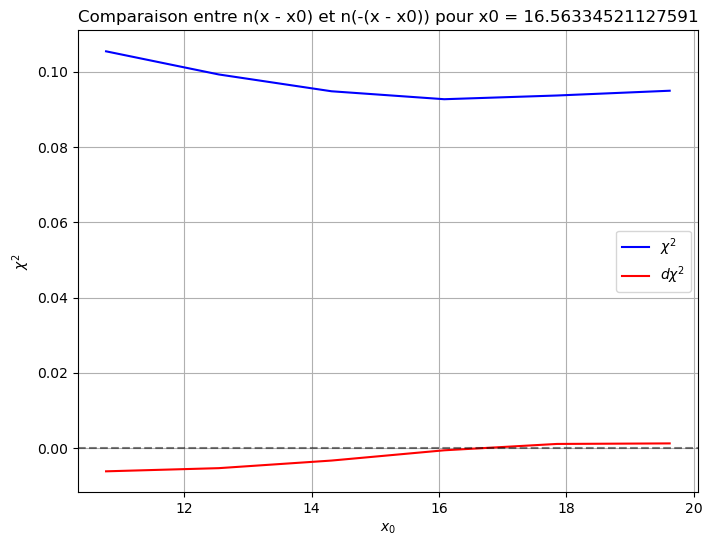

In [165]:
# Calculer la fonction 
#MASK = mask
#CHI2 = np.array([chi_squared_and_plot(np.flip(X[mask]), np.flip(Y[mask]), x0, sigma=None) for x0 in np.flip(X[MASK])])
CHI2 = np.array([chi_squared_and_plot(np.flip(X[mask]), np.flip(y_smoothed[mask]), x0, sigma=None) for x0 in np.flip(X[MASK])])
plt.figure(figsize=(8, 6))
plt.plot(np.flip(X[MASK]), CHI2, label=f'$\\chi^2$', color='blue')
plt.plot(np.flip(X[MASK]), np.gradient(CHI2), label=f'$d\\chi^2$', color='red')
plt.title(f'Comparaison entre n(x - x0) et n(-(x - x0)) pour x0 = {x0}')
#plt.axvline(x=x0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
#plt.xlim([90 , 120 ])
#plt.ylim([-100, 200 ])
plt.xlabel('$x_0$')
plt.ylabel(f'$\\chi^2$')
plt.legend()
plt.grid(True)
plt.show()

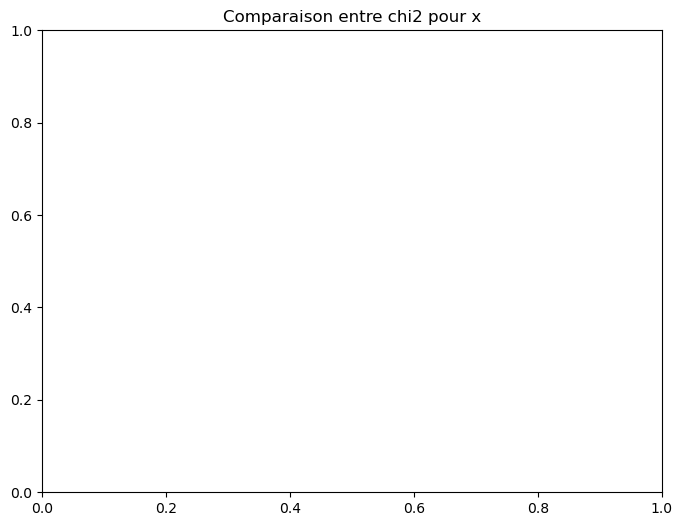

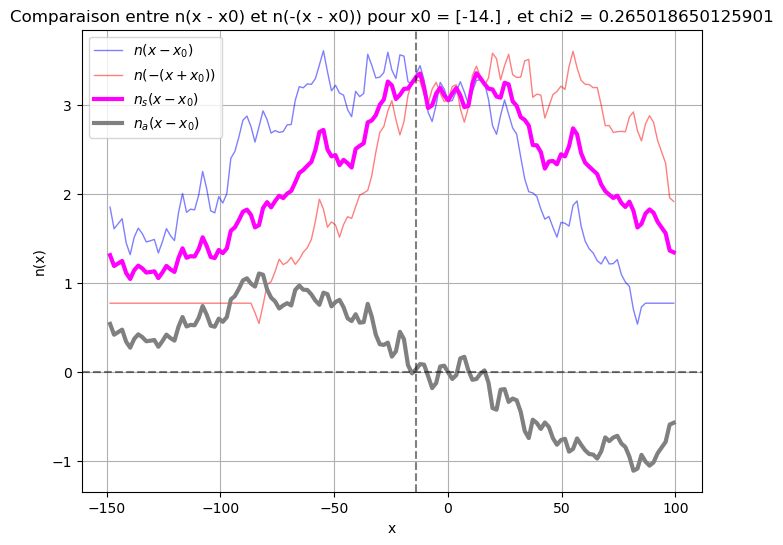

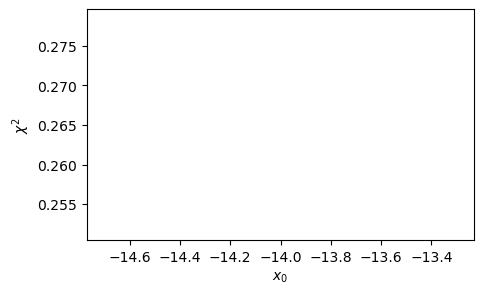

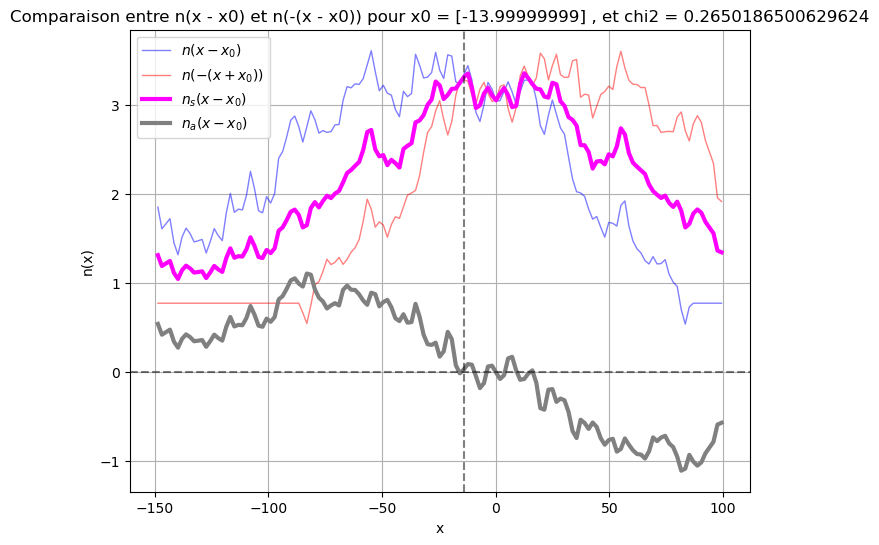

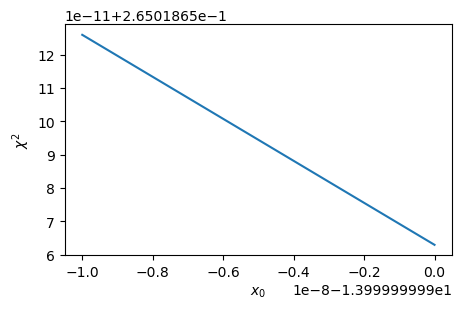

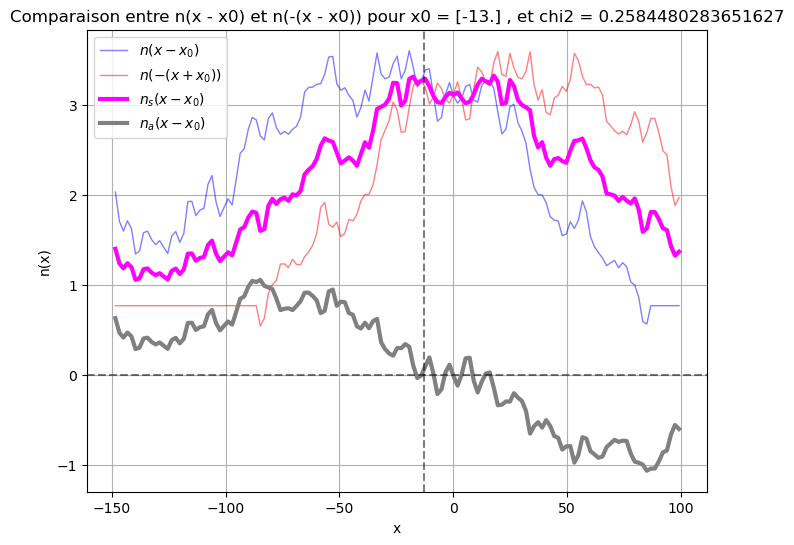

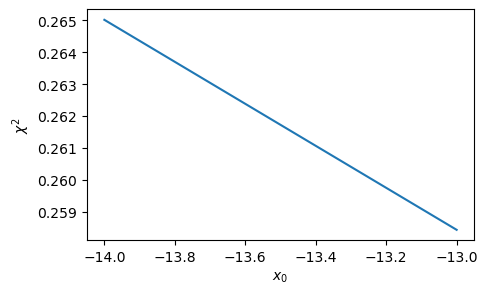

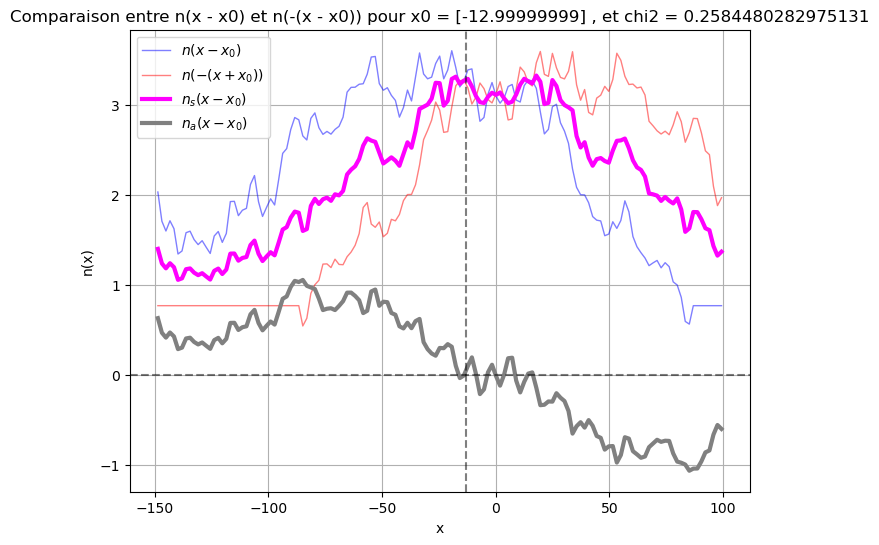

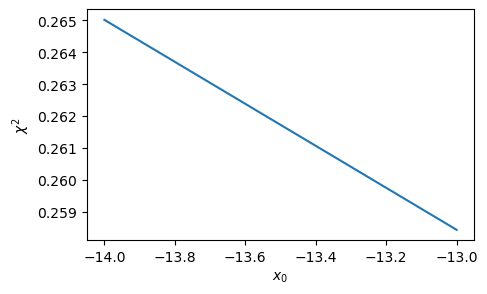

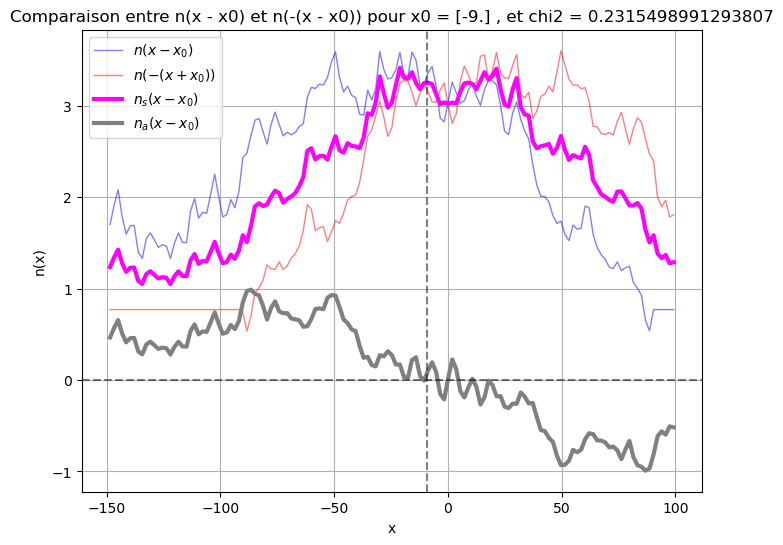

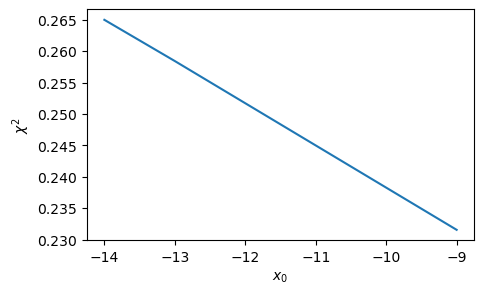

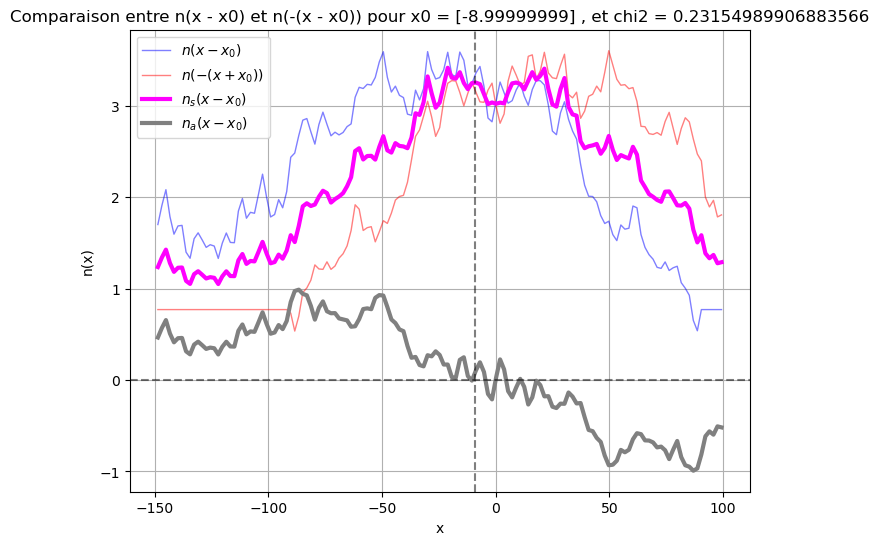

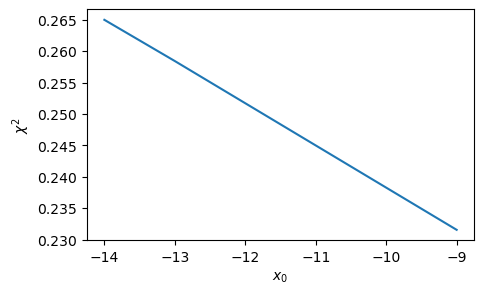

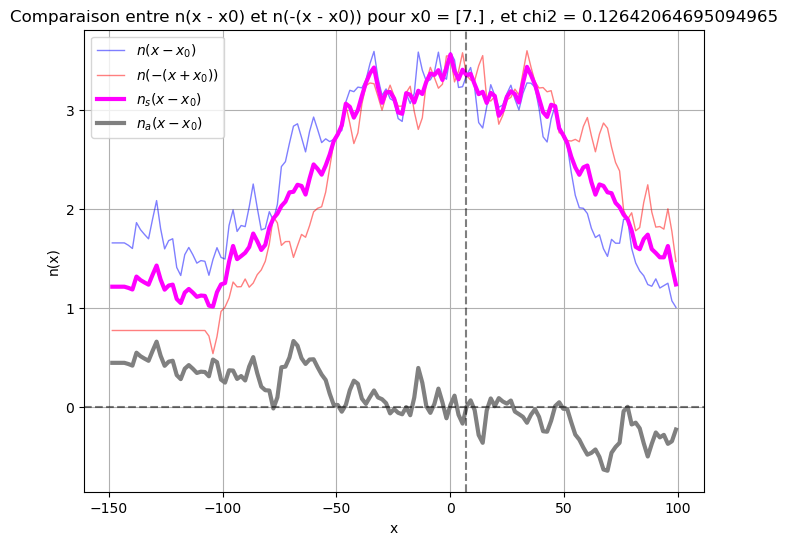

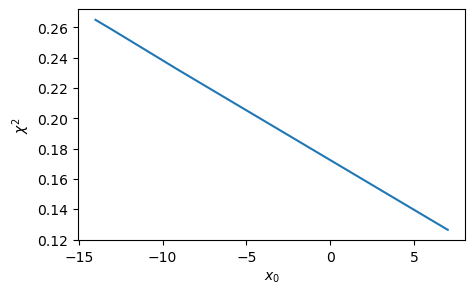

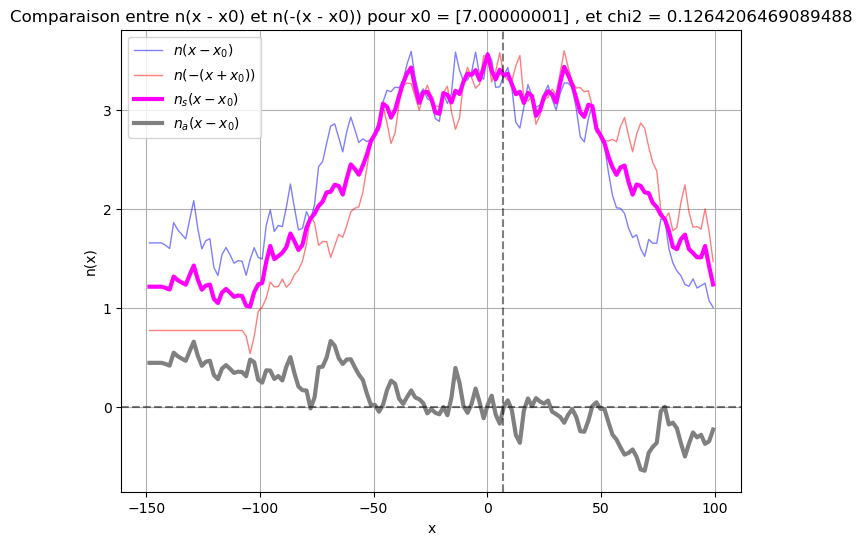

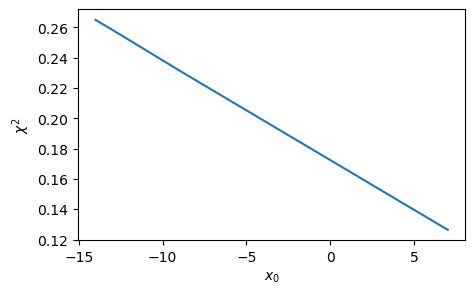

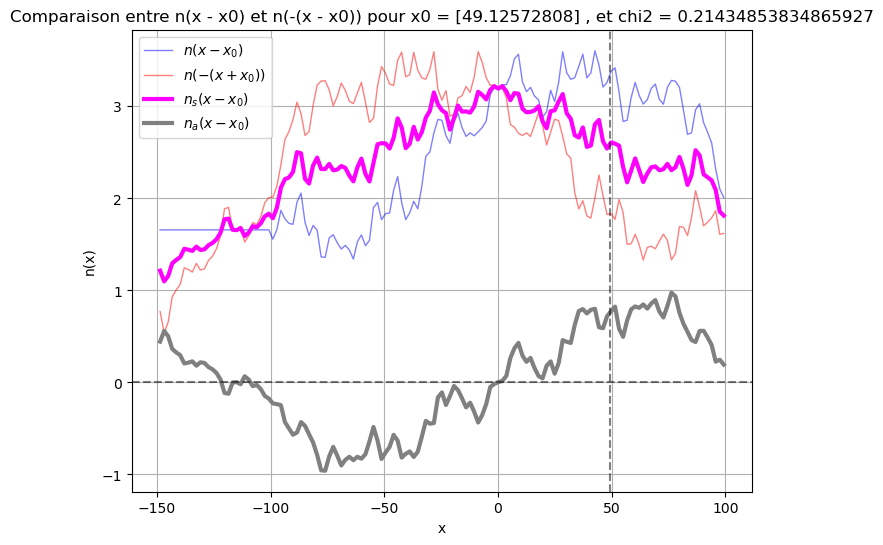

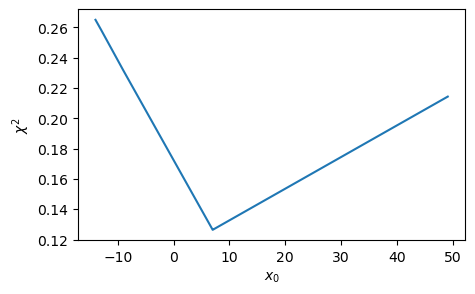

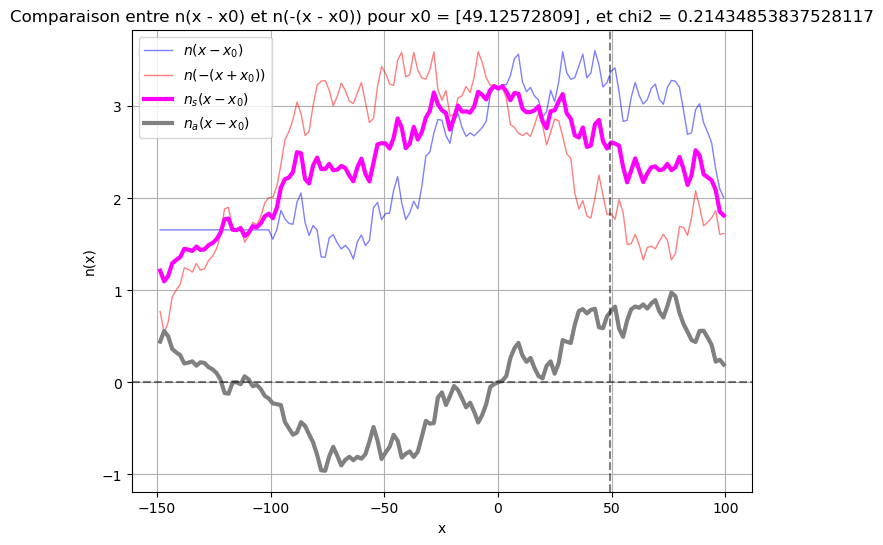

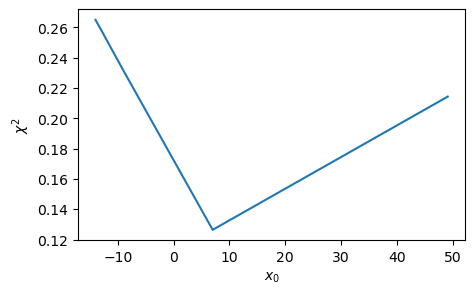

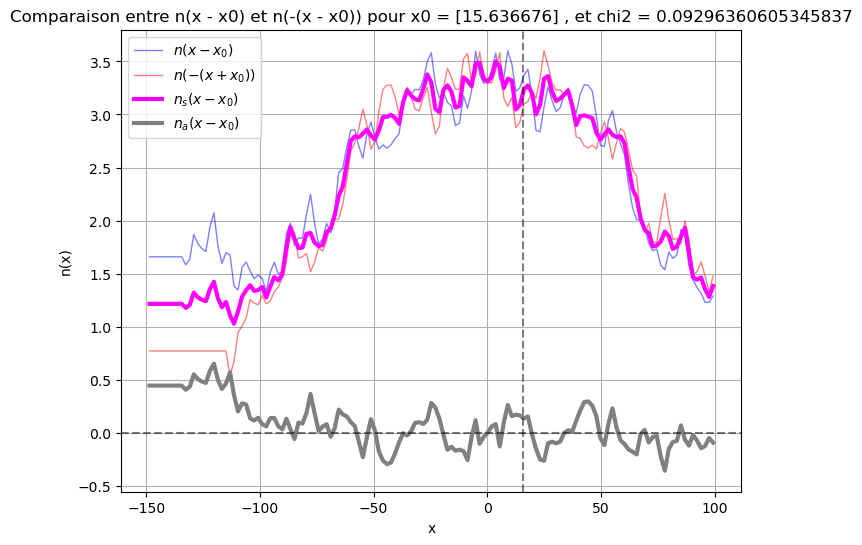

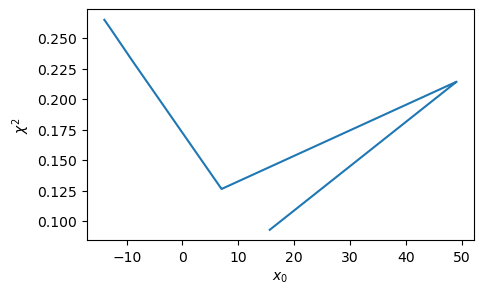

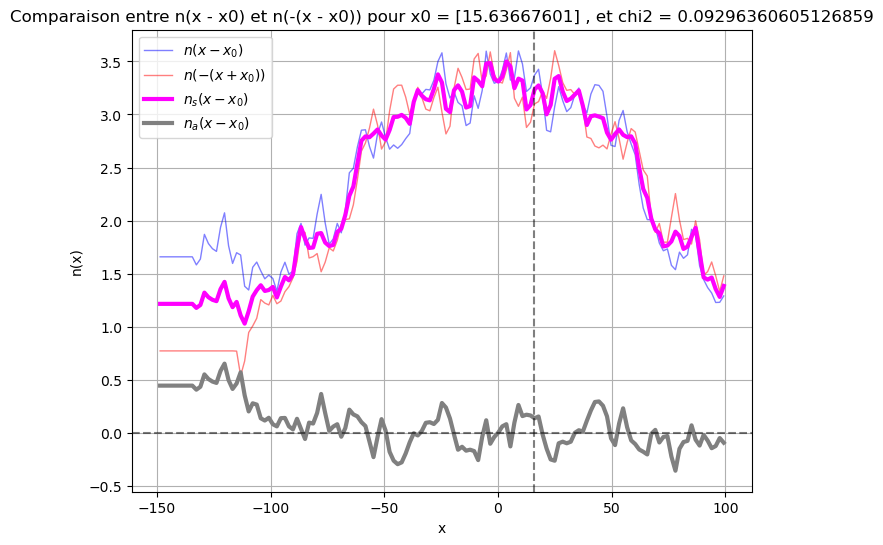

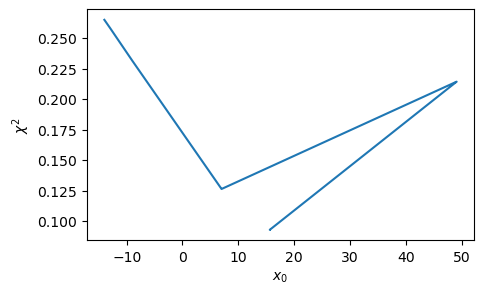

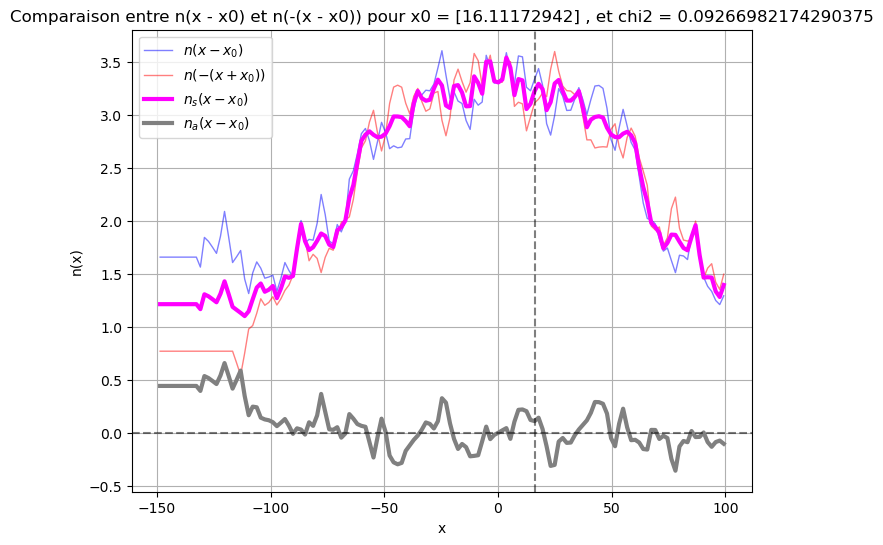

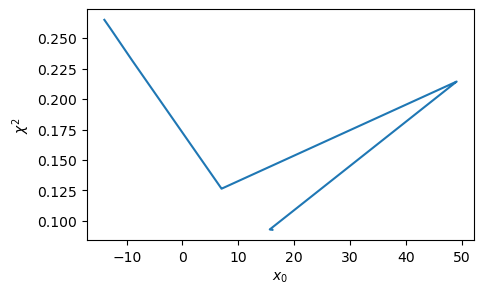

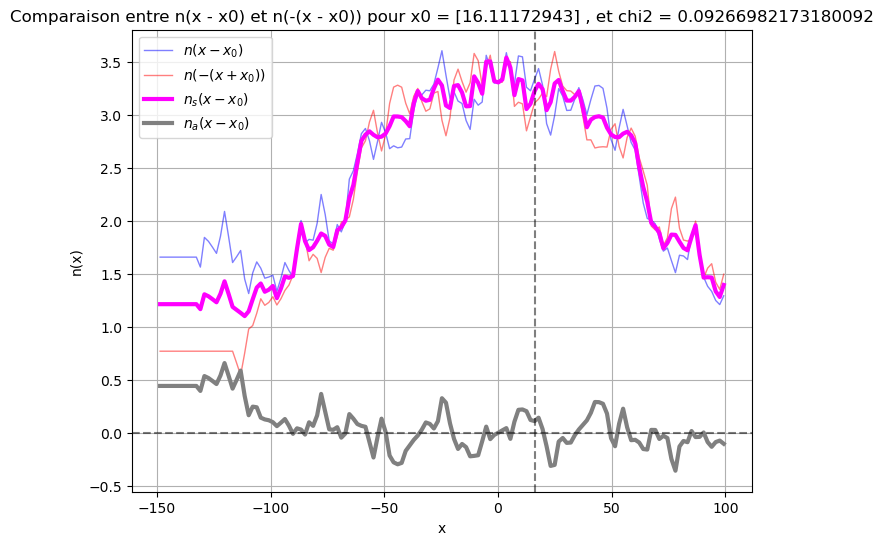

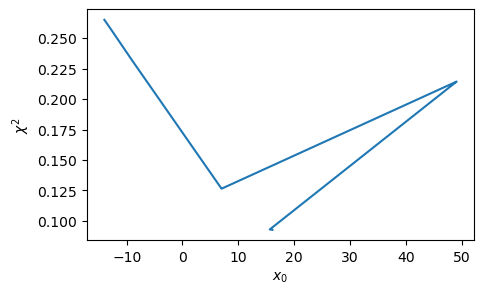

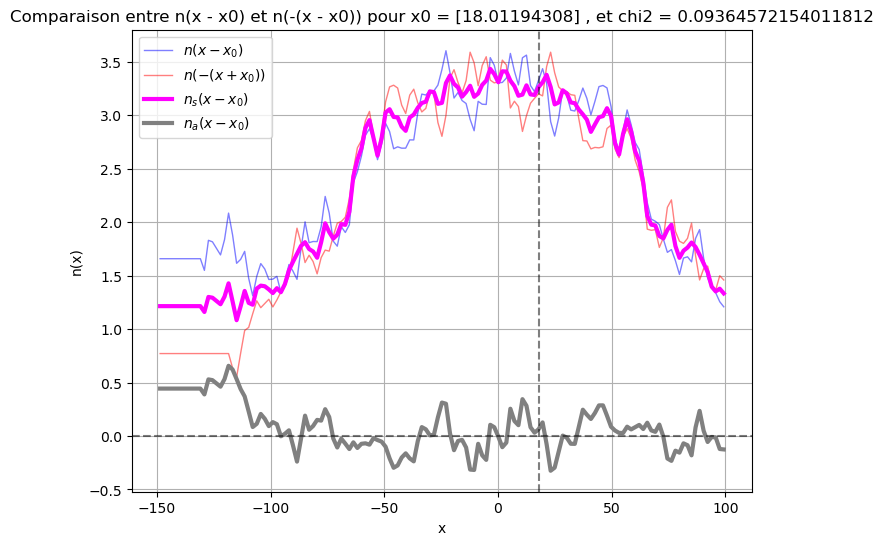

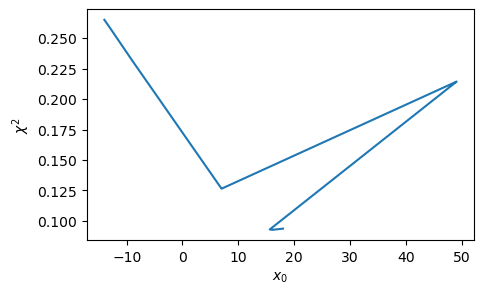

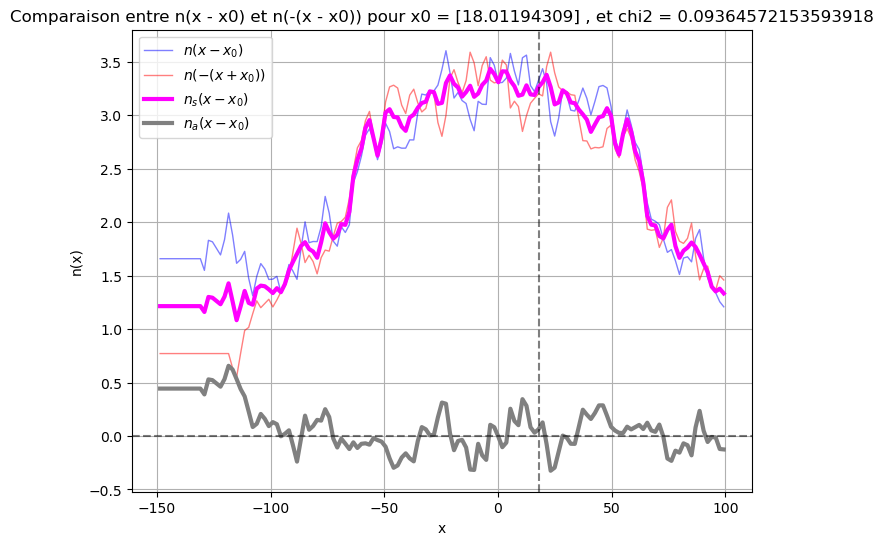

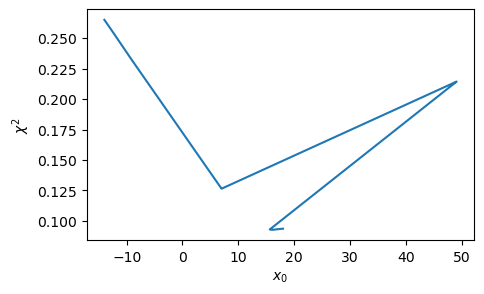

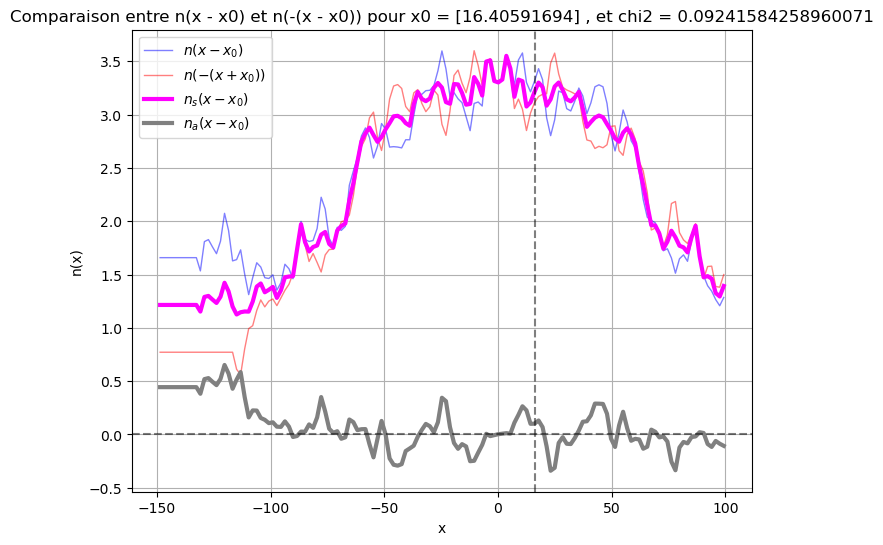

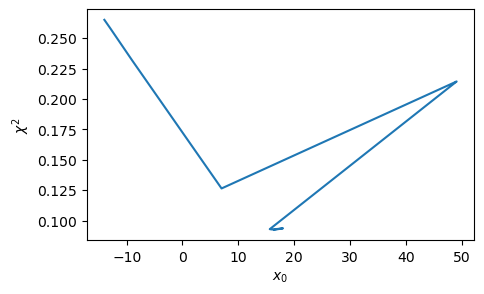

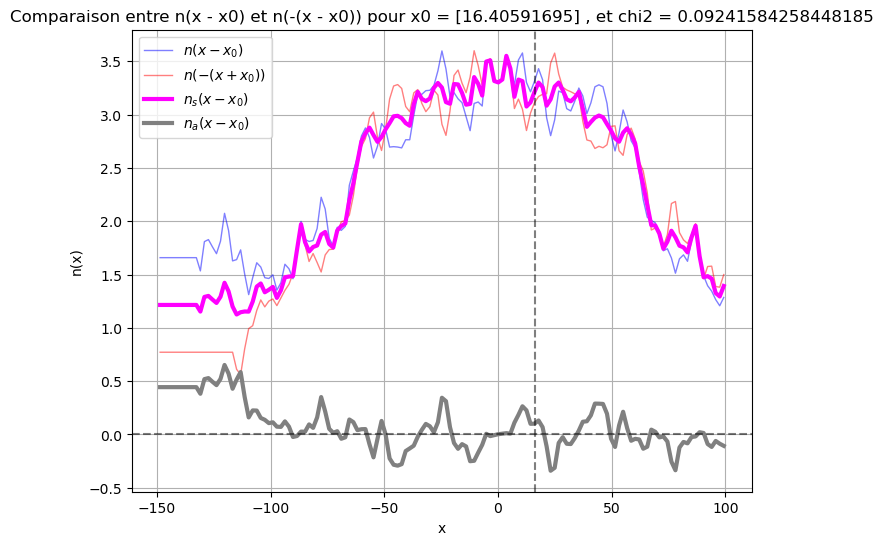

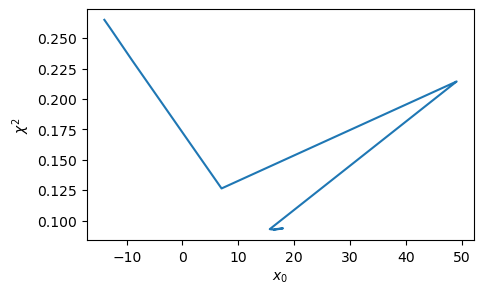

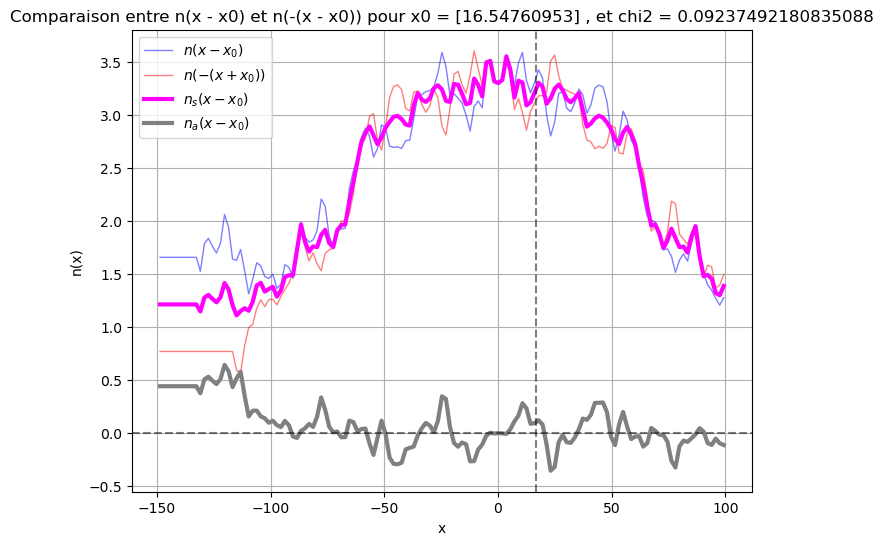

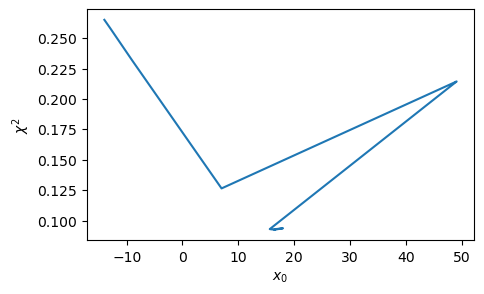

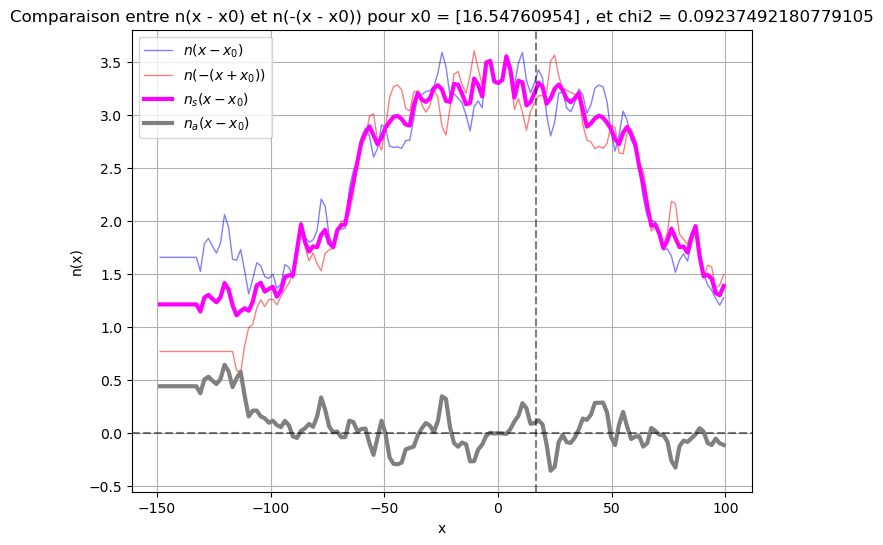

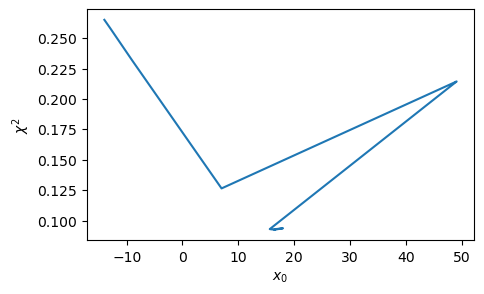

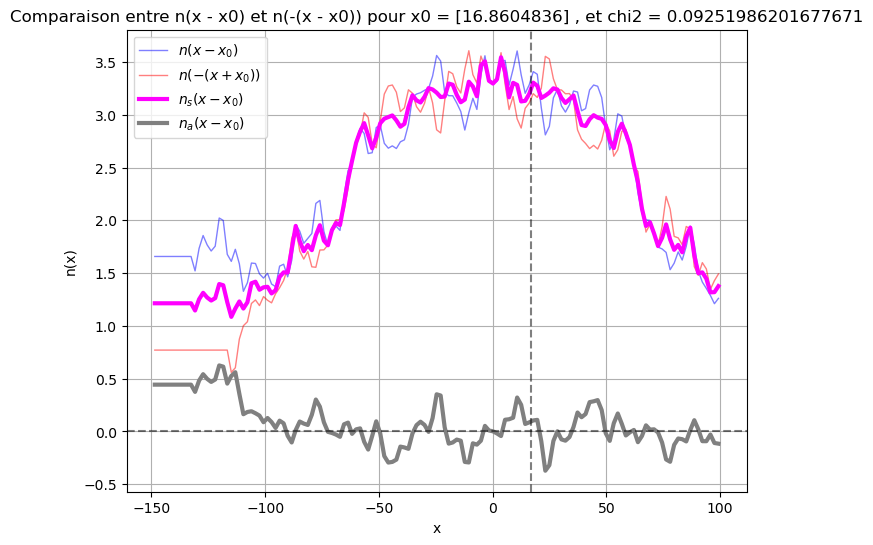

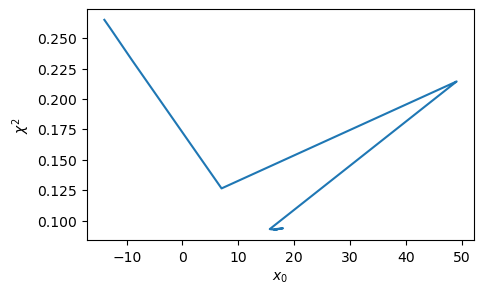

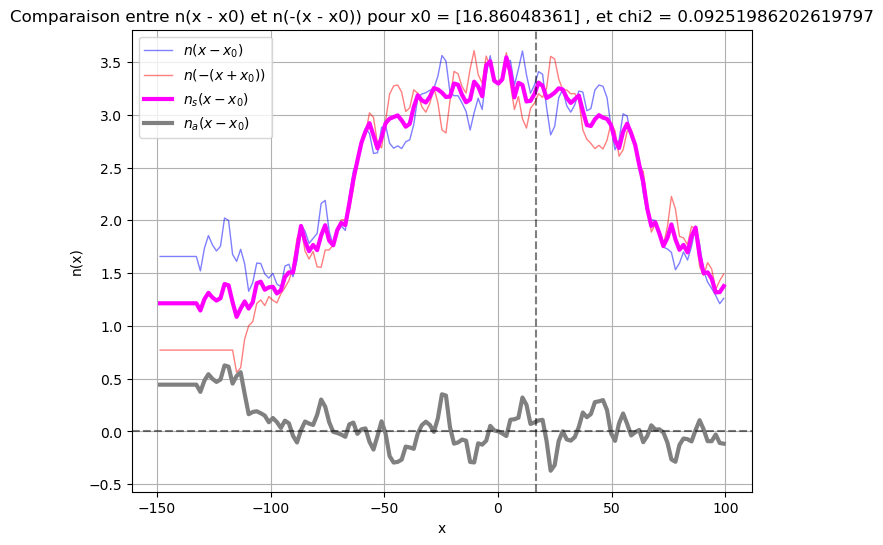

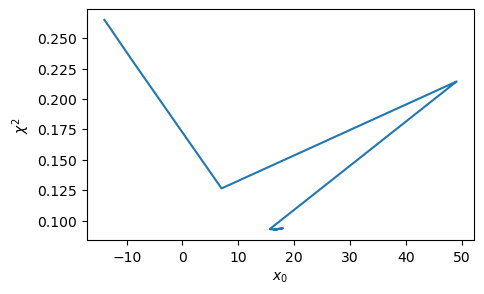

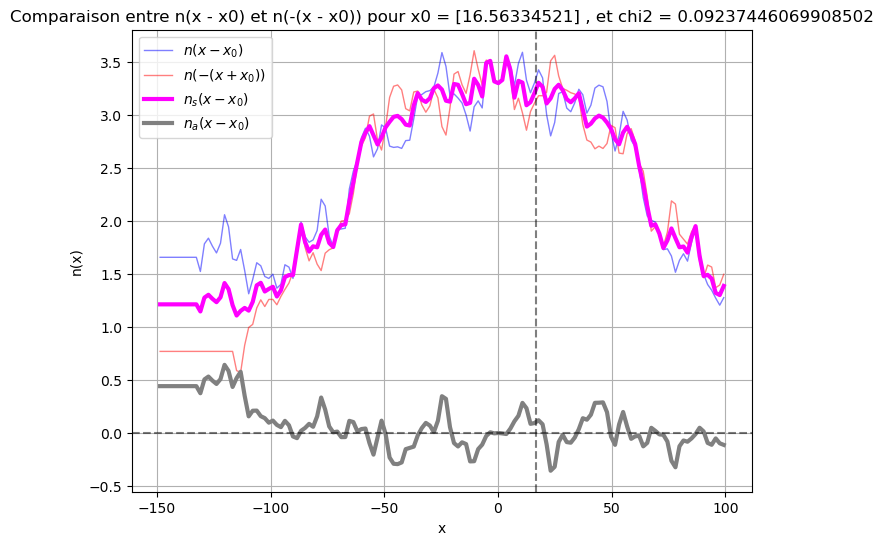

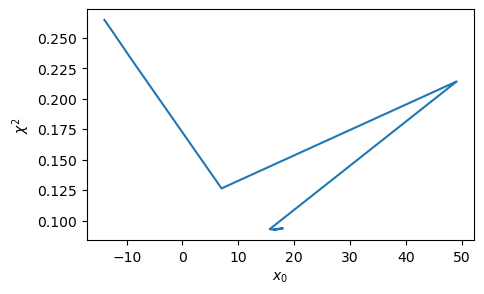

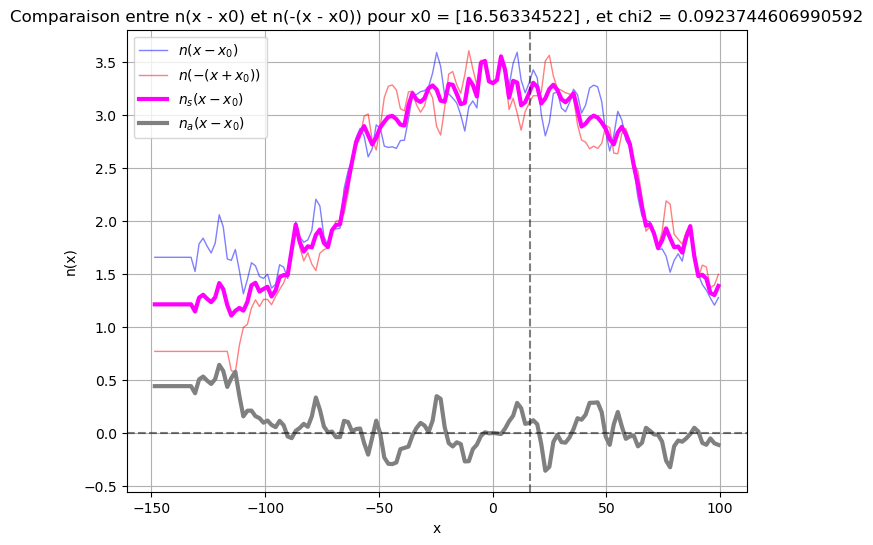

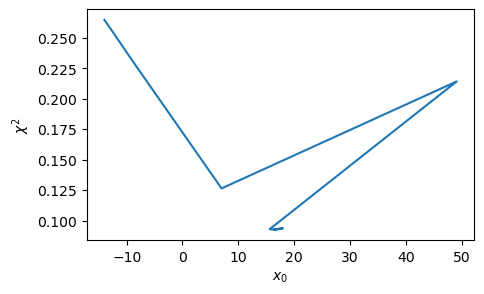

Optimisation terminée. x0 optimisé : 16.56334521127591, Chi-carré final : 0.09237446069908502


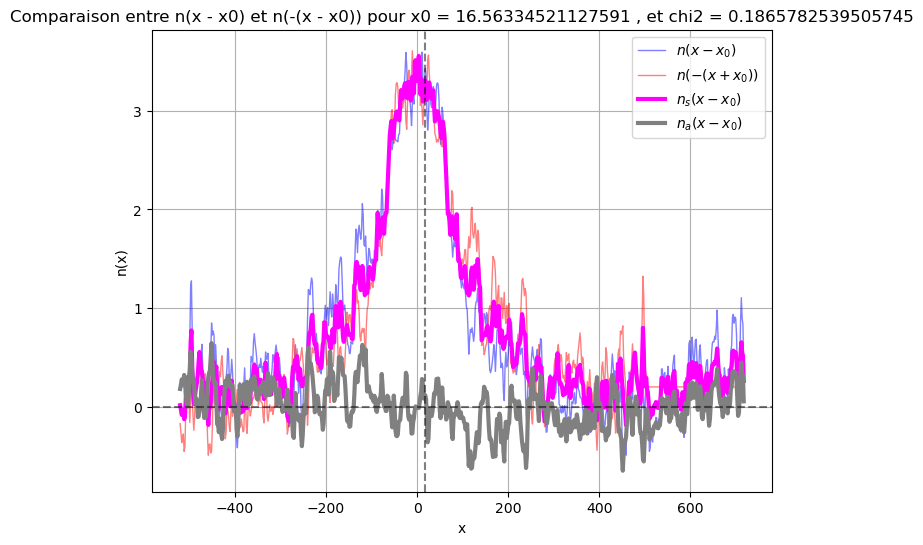

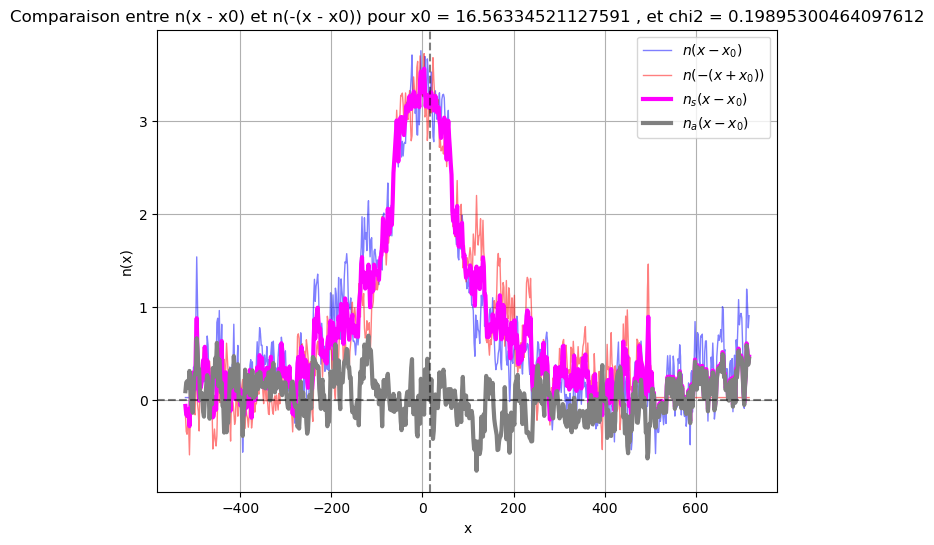

0.19895300464097612

In [167]:
#Cercher min 

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

X0 , YChi2 = [] , []
plt.figure(figsize=(8, 6))
plt.title(f'Comparaison entre chi2 pour x')
# Fonction à minimiser (chi-carré en fonction de x0)
def objective_function(x0, x, y):
    chi = chi_squared_and_plot(x, y, x0)
    X0.append(x0)
    YChi2.append(chi)
    plt.plot( X0 , YChi2 ) 
    plt.xlabel('$x_0$')
    plt.ylabel(f'$\\chi^2$')
    plt.show()
    return chi


# Paramètres d'initialisation
#p0 =  117 # Estimation initiale pour x0
lower_bound = 0.5*p0  # Borne inférieure pour x0
upper_bound = 1.5*p0  # Borne supérieure pour x0

# Utilisation de scipy.optimize.minimize pour trouver le minimum de chi-carré
result = minimize(
    objective_function,  # Fonction objectif
    p0,  # Estimation initiale de x0
    args=(np.flip(X[mask]), np.flip(y_smoothed[mask])),  # Arguments supplémentaires (x_data, y_data)
    #args=(np.flip(X[mask]), np.flip(Y[mask])),  # Arguments supplémentaires (x_data, y_data)
    #bounds=[(lower_bound, upper_bound)],  # Bornes pour x0
    method='L-BFGS-B'  # Méthode de quasi-Newton avec bornes
)

# Résultat de l'optimisation
print(f"Optimisation terminée. x0 optimisé : {result.x[0]}, Chi-carré final : {result.fun}")


chi_squared_and_plot(np.flip(X), np.flip(y_smoothed), result.x[0])
chi_squared_and_plot(np.flip(X), np.flip(Y), result.x[0])

<>:55: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\q'
<>:55: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\q'
<>:55: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sc/1jlhfymx3sg5vz8q1fx87pvr0000gn/T/ipykernel_67651/1601078509.py:55: SyntaxWarning: invalid escape sequence '\m'
  f'$x_0 = {x0:.3f}~\mu m, \; \\chi^2 = 2 \\Vert n_a^f \\Vert^2_2 = {chi2:.3f}~(\mu m)^{-2}; \quad (d = {window_size:.3f}~\mu m)$'
/var/folders/sc/1jlhfymx3sg5vz8q1fx87pvr0000gn/T/ipykernel_67651/1601078509.py:55: SyntaxWarning: invalid escape sequence '\m'
  f'$x_0 = {x0:.3f}~\mu m, \; \\chi^2 = 2 \\Vert n_a^f \\Vert^2_2 = {chi2:.3f}~(\mu m)^{-2}; \quad (d = {window_size:.3f}~\mu m)$'
/var/folders/sc/1jlhfymx3sg5vz8q1fx87pvr0000gn/T/ipykernel_67651/1601078509.

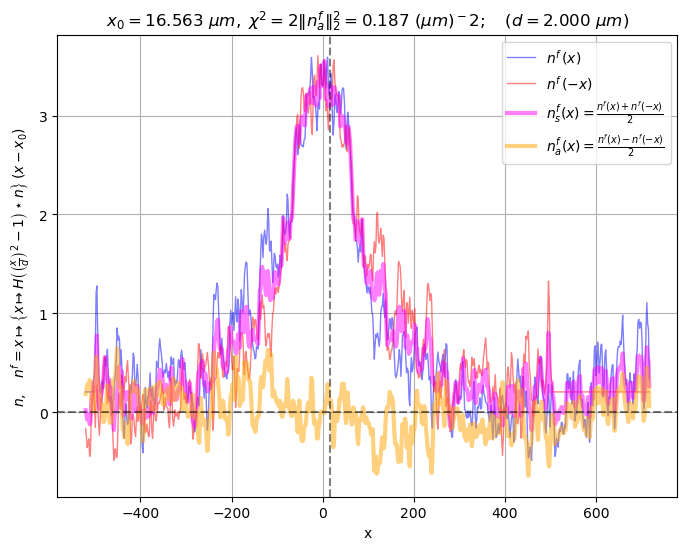

In [169]:
# Fonction d'interpolation de n(x) (renvoie 0 si x est en dehors des bornes)
def n(x_val):
    if x_val < min(x):
        return y[0]  # Retourne 0 si x est hors des bornes
    elif x_val > max(x):
        return y[-1]

    from scipy.interpolate import CubicSpline

    # Créer l'interpolateur spline cubique
    spline = CubicSpline(x, y)

    # Générer des points à interpoler
    y_new = spline(x_val)
    return y_new#np.interp(x_val, x, y)  # Interpolation linéaire

x , y = np.flip(X), np.flip(y_smoothed)
#x , y = np.flip(X), np.flip(Y)

x0 = result.x[0]
n_x_minus_x0 = [n(xi-x0)for xi in x]

n_neg_x_minus_x0 = [n(-xi-x0)for xi in x]

n_neg_x_minus_x0 = [item if isinstance(item, np.float64) else item.item() for item in n_neg_x_minus_x0]
n_x_minus_x0 = [item if isinstance(item, np.float64) else item.item() for item in n_x_minus_x0]

n_s = (np.array(n_x_minus_x0) + np.array(n_neg_x_minus_x0))/2
n_a = (np.array(n_x_minus_x0) - np.array(n_neg_x_minus_x0))/2


diff = np.array(n_x_minus_x0) - np.array(n_neg_x_minus_x0)

# Calcul de chi²
sigma = None
if sigma is None:sigma = np.ones_like(y)  # Si sigma n'est pas spécifié, on prend une incertitude de 1

chi2 = np.sum((np.array(diff) ** 2) / (np.array(sigma) ** 2))
chi2 = norme(diff/2, 2)/norme(n_x_minus_x0 , 2)

x_vals = x

# Tracé des deux courbes
plt.figure(figsize=(8, 6))
#plt.plot(x_vals, n_x, label=r'$n(x)$', color='blue')
plt.plot(x_vals, n_x_minus_x0, label=r'$n^f \,(x)$', color='blue' ,  linewidth=1, alpha=0.5 )


#plt.plot(x_vals, n_neg_x_plus_x0, label=r'$n(-(x - x_0))$', color='red', linestyle='--')
plt.plot(x_vals, n_neg_x_minus_x0, label=r'$n^f \,(-x )$', color='red',  linewidth=1, alpha=0.5)
plt.plot(x_vals, n_s, label=r'$n_s^f(x) = \frac{n^f(x) + n^f(-x)}{2}$', color='magenta', linestyle='-' , linewidth=3 , alpha = 0.5 )
plt.plot(x_vals, n_a, label=r'$n_a^f(x) = \frac{n^f(x) - n^f(-x)}{2}$', color='orange', linestyle='-' , linewidth=3 , alpha = 0.5 ) 
#plt.scatter(X, Y, color='black', label=r'Données originales $n(x)$')
plt.title(
    f'$x_0 = {x0:.3f}~\mu m, \; \\chi^2 = 2 \\Vert n_a^f \\Vert^2_2 = {chi2:.3f}~(\mu m)^{-2}; \quad (d = {window_size:.3f}~\mu m)$'
)
plt.axvline(x=x0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.xlabel('x')
plt.ylabel(r'$n , \quad n^f = x \mapsto \left \{x \mapsto H\left(\left(\frac{x}{d}\right)^2 - 1\right) \star n \right\}\, ( x -x_0 ) $ ')
plt.legend()
plt.grid(True)
#plt.savefig('./graphique_transparent.png', transparent=True)
#plt.savefig('./graphique_high_res.png', dpi=300) 
plt.show()


In [171]:
colors = [
    #"#1f77b4",  # Bleu
    #"#ff7f0e",  # Orange
    #"#2ca02c",  # Vert
    #"#d62728",  # Rouge
    "#9467bd",  # Violet
    "#8c564b",  # Marron
    "#e377c2",  # Rose
    "#7f7f7f",  # Gris
    "#bcbd22",  # Jaune Olive
    "#17becf"   # Cyan
]

16.56334521127591


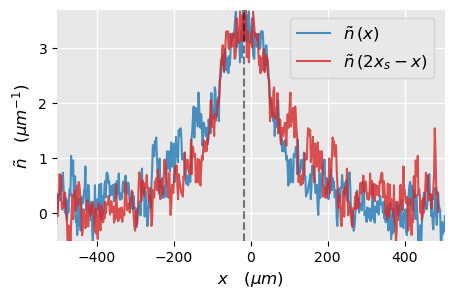

✅ Fichier enregistré sous : donnee_article_asymetrie_24-04-202.table
# x y type
14.34001 -1.30908 i
14.30461 -3.04924 i
14.26921 -2.66126 i
14.23381 -0.64307 i
14.19841 1.21349 i
14.16301 1.49396 i
14.12761 0.34258 i
14.09221 -0.52149 i
14.05681 -1.11393 i
14.02141 0.06968 i
13.98601 2.04800 i
13.95061 2.21859 i
13.91521 2.86564 i
13.87981 2.67084 i
13.84441 1.47225 i
13.80901 0.56580 i
13.77361 -0.00891 i
13.73821 0.61492 i
13.70281 1.67857 i
13.66741 2.30289 i
13.63201 2.46393 i
13.59661 2.32107 i
13.56121 2.33340 i
13.52581 2.65874 i
13.49041 1.84609 i
13.45501 1.57129 i
13.41961 1.17766 i
13.38421 0.36298 i
13.34881 1.11017 i
13.31341 0.46673 i
13.27801 0.18419 i
13.24261 0.83175 i
13.20721 0.70423 i
13.17181 1.06286 i
13.13641 0.77100 i
13.10101 0.09337 i
13.06561 0.22089 i
13.03021 0.84962 i
12.99481 0.76677 i
12.95941 0.86159 i
12.92401 1.29921 i
12.88861 1.63329 i
12.85321 2.52933 i
12.81781 2.39504 i
12.78241 1.83371 i
12.74701 1.93865 i
12.71161 1.79224 i
12.67621 1.76880 i
1

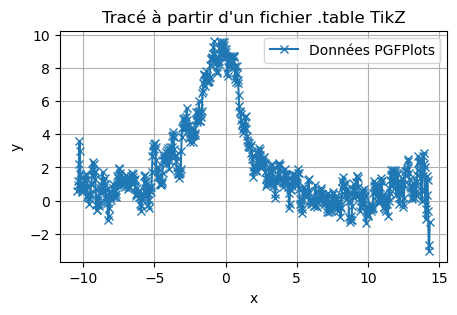

✅ Fichier enregistré sous : donnee_2_article_asymetrie_24-04-202.table
# x y type
-15.00255 -1.30908 i
-14.96715 -3.04924 i
-14.93175 -2.66126 i
-14.89635 -0.64307 i
-14.86095 1.21349 i
-14.82555 1.49396 i
-14.79015 0.34258 i
-14.75475 -0.52149 i
-14.71935 -1.11393 i
-14.68395 0.06968 i
-14.64855 2.04800 i
-14.61315 2.21859 i
-14.57775 2.86564 i
-14.54235 2.67084 i
-14.50695 1.47225 i
-14.47155 0.56580 i
-14.43615 -0.00891 i
-14.40075 0.61492 i
-14.36535 1.67857 i
-14.32995 2.30289 i
-14.29455 2.46393 i
-14.25915 2.32107 i
-14.22375 2.33340 i
-14.18835 2.65874 i
-14.15295 1.84609 i
-14.11755 1.57129 i
-14.08215 1.17766 i
-14.04675 0.36298 i
-14.01135 1.11017 i
-13.97595 0.46673 i
-13.94055 0.18419 i
-13.90515 0.83175 i
-13.86975 0.70423 i
-13.83435 1.06286 i
-13.79895 0.77100 i
-13.76355 0.09337 i
-13.72815 0.22089 i
-13.69275 0.84962 i
-13.65735 0.76677 i
-13.62195 0.86159 i
-13.58655 1.29921 i
-13.55115 1.63329 i
-13.51575 2.52933 i
-13.48035 2.39504 i
-13.44495 1.83371 i
-13.40955 1

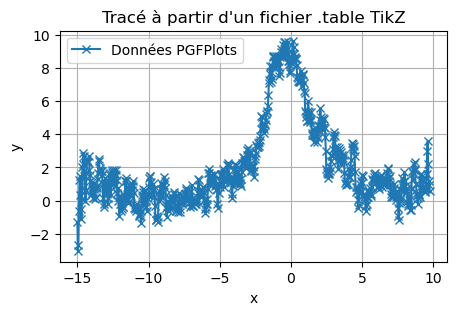

In [175]:
# Tracé des deux courbes
print(x0)
plt.figure()
### Plot style
police = 12
plt.rcParams["figure.figsize"] = (5,3)

#plt.plot(x_vals, n_x, label=r'$n(x)$', color='blue')
#plt.plot(x_vals, n_x_minus_x0, label=r'$n^f \,(x)$', color='blue' ,  linewidth=1, alpha=0.5 )
#plt.plot(X+x0, Y, label=r'$n \,(x -x_0)$', color="#1f77b4" ,  linewidth=1.5, alpha=0.8 )
#plt.plot(X+x0, y_smoothed, label=r'$n^s \,(+x)$', color="#1f77b4" ,  linewidth=1.5, alpha=0.8 )
#plt.plot(X, y_smoothed, label=r'$\tilde{n} \,(x)$', color="#1f77b4" ,  linewidth=1.5, alpha=0.8 )
plt.plot(X, Y, label=r'$\tilde{n} \,(x)$', color="#1f77b4" ,  linewidth=1.5, alpha=0.8 )


#plt.plot(x_vals, n_neg_x_plus_x0, label=r'$n(-(x - x_0))$', color='red', linestyle='--')
#plt.plot(x_vals, n_neg_x_minus_x0, label=r'$n^f \,(-x )$', color='red',  linewidth=1, alpha=0.5)
#plt.plot(-X-x0, Y, label=r'$n \,(-x-x_0 )$', color="#d62728",  linewidth=1.5, alpha=0.8)
#plt.plot(-X-x0, y_smoothed, label=r'$n^s \,(-x)$', color="#d62728",  linewidth=1.5, alpha=0.8)
#plt.plot(-X-2*x0, y_smoothed, label=r'$\tilde{n} \,(2x_s-x)$', color="#d62728" ,  linewidth=1.5, alpha=0.8 )
plt.plot(-X-2*x0, Y, label=r'$\tilde{n} \,(2x_s-x)$', color="#d62728" ,  linewidth=1.5, alpha=0.8 )
#plt.plot(X-2*x0, y_smoothed, label=r'$\tilde{n} \,(2x_s-x)$', color="#d62728" ,  linewidth=1.5, alpha=0.8 )

#plt.plot(X+x0, y_smoothed, label=r'$n^f \,(x)$', color="#7f7f7f" ,  linewidth=1.5, alpha=1 )
#plt.plot(-X-x0, y_smoothed, label=r'$n^f \,(-x)$', color="#8c564b",  linewidth=1.5, alpha=1)
#plt.plot(x_vals, n_s, label=r'$n_s^f(x) = \frac{n^f(x) + n^f(-x)}{2}$', color='magenta', linestyle='-' , linewidth=3 , alpha = 0.5 )
#plt.plot(x_vals, n_a, label=r'$n_a^f(x) = \frac{n^f(x) - n^f(-x)}{2}$', color='orange', linestyle='-' , linewidth=3 , alpha = 0.5 ) 
#plt.scatter(X, Y, color='black', label=r'Données originales $n(x)$')
#plt.title(
#    f'$x_s = {x0:.3f}~\mu m, \; \\chi = \\Vert n_a^s \\Vert_2/\\Vert n^s \\Vert_2= {chi2:.3f}; \quad (d = {window_size:.0f}~\mu m)$',
#    fontsize=14, color='black'
#)
#plt.axvline(x=X[-1]+x0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
#plt.axvline(x=-X[-1]-x0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axvline(x=-x0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.xlim([X[-1]+x0 , -X[-1]-x0])
plt.ylim([-0.5 , 3.7])
#plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.xlabel(r'$x\quad (\mu m)$', fontsize=police, color='black')#, fontweight='bold')
#plt.ylabel(r'$n^s ~\colon~ x \mapsto \left \{n \star \left(y \mapsto   H\left(\left(\frac{y}{d}\right)^2 - 1\right) \right) \right\}\, ( x -x_c ) ~~(1/\mu m )$ ' , fontsize=14, color='black' )
#plt.ylabel(r'$n^s = \left \{n \star \left(y \mapsto   H\left(\left(\frac{y}{d}\right)^2 - 1\right) \right) \right\} ~~(1/\mu m )$ ' , fontsize=14, color='black' )
plt.ylabel(r'$\tilde{n} \quad (\mu m^{-1} $) ' , fontsize=police, color='black' )

plt.grid(color='white', linestyle='-', linewidth=1)

# Appliquer un fond gris
#plt.gca().set_facecolor('lightgray')  # Fond gris pour le canevas


# Appliquer un fond gris clair au graphe
#plt.gca().set_facecolor('#f0f0f0')  # Fond gris très clair (hex pour personnalisation)
plt.gca().set_facecolor('#e8e8e8')  # Fond gris plus foncé

# Rendre le cadre invisible
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

#plt.gcf().set_facecolor('lightgray')  # Fond gris pour l'ensemble de la figure

# Ajouter une légende avec fond gris et bordure blanche
plt.legend(
    fontsize=police,
    facecolor='#e8e8e8',  # Fond gris pour la légende
    #edgecolor='#b0b0b0',       # Bordure blanche pour la légende
    bbox_to_anchor=(0.58, 1.0)  # Ajuster ici (x, y)
)
plt.grid(True)
#plt.savefig('./article_asymetrie_24-04-2024.pdf', bbox_inches='tight', dpi = 300)
#plt.savefig('./article_asymetrie_24-04-2024.svg', bbox_inches='tight', dpi = 300)
plt.show()

# 500 mu m pour 10 cm
# 3 mu m -1  c'est 8 cm sur lon graphe 
save_as_tikz_table(X*10/(500), y_smoothed*8/3, filename="donnee_article_asymetrie_24-04-202.table")
read_and_plot_table(filename="donnee_article_asymetrie_24-04-202.table")
save_as_tikz_table((-X-2*x0)*10/(500), y_smoothed*8/3, filename="donnee_2_article_asymetrie_24-04-202.table")
read_and_plot_table(filename="donnee_2_article_asymetrie_24-04-202.table")

<>:60: SyntaxWarning: invalid escape sequence '\q'
<>:61: SyntaxWarning: invalid escape sequence '\q'
<>:60: SyntaxWarning: invalid escape sequence '\q'
<>:61: SyntaxWarning: invalid escape sequence '\q'
/var/folders/sc/1jlhfymx3sg5vz8q1fx87pvr0000gn/T/ipykernel_67651/2542708223.py:60: SyntaxWarning: invalid escape sequence '\q'
  plt.xlabel("$x\quad (\mu$m)", fontsize = police, color = "black")
/var/folders/sc/1jlhfymx3sg5vz8q1fx87pvr0000gn/T/ipykernel_67651/2542708223.py:61: SyntaxWarning: invalid escape sequence '\q'
  plt.ylabel("$n\quad (\mu$m$^{-1}$)", fontsize = police, color = "black")


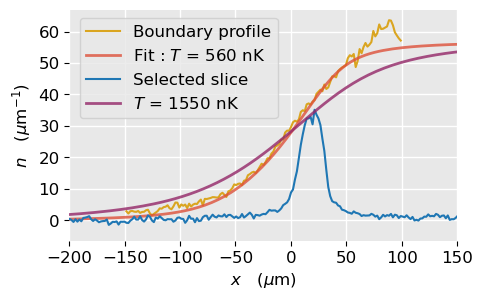

✅ Fichier enregistré sous : donnee_bord_article_distribution_24-04-2024.table
# x y type
40.97147 -0.29119 i
40.87033 -0.56253 i
40.76918 -0.21804 i
40.66804 -0.05903 i
40.56690 -0.04819 i
40.46575 -0.06225 i
40.36461 -0.14268 i
40.26347 -0.42442 i
40.16233 -0.53502 i
40.06118 -0.37560 i
39.96004 -0.19384 i
39.85890 0.06993 i
39.75775 0.00087 i
39.65661 -0.23506 i
39.55547 -0.35793 i
39.45433 -0.54905 i
39.35318 -0.44539 i
39.25204 -0.25644 i
39.15090 -0.27184 i
39.04975 -0.40730 i
38.94861 -0.23902 i
38.84747 -0.44957 i
38.74633 -0.18479 i
38.64518 -0.24406 i
38.54404 -0.27847 i
38.44290 -0.10603 i
38.34175 -0.40717 i
38.24061 -0.30057 i
38.13947 -0.30349 i
38.03833 -0.31506 i
37.93718 -0.26521 i
37.83604 -0.40157 i
37.73490 -0.24533 i
37.63375 -0.31443 i
37.53261 -0.37357 i
37.43147 -0.29297 i
37.33033 -0.27770 i
37.22918 -0.25706 i
37.12804 -0.18222 i
37.02690 -0.00128 i
36.92575 -0.20499 i
36.82461 -0.30312 i
36.72347 -0.26870 i
36.62233 -0.20270 i
36.52118 -0.32283 i
36.42004 -0.3

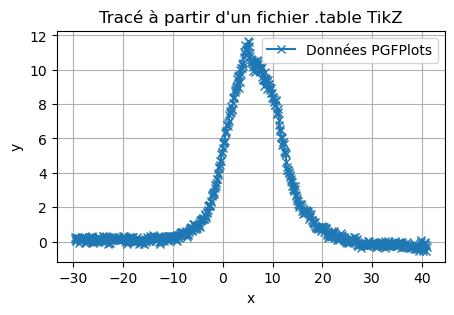

✅ Fichier enregistré sous : donnee_selection_1_article_distribution_24-04-2024.table
# x y type
40.97147 -0.36389 i
40.87033 -0.31991 i
40.76918 -0.27248 i
40.66804 -0.13855 i
40.56690 -0.02924 i
40.46575 -0.10882 i
40.36461 -0.20080 i
40.26347 -0.45781 i
40.16233 -0.42355 i
40.06118 -0.41242 i
39.96004 -0.32552 i
39.85890 -0.17847 i
39.75775 -0.19508 i
39.65661 -0.17704 i
39.55547 -0.37671 i
39.45433 -0.30001 i
39.35318 -0.34510 i
39.25204 -0.53376 i
39.15090 -0.34494 i
39.04975 -0.47504 i
38.94861 -0.29084 i
38.84747 -0.42075 i
38.74633 -0.32694 i
38.64518 -0.20097 i
38.54404 -0.34802 i
38.44290 -0.28449 i
38.34175 -0.30168 i
38.24061 -0.16386 i
38.13947 0.00814 i
38.03833 -0.07412 i
37.93718 -0.20352 i
37.83604 -0.19231 i
37.73490 -0.58071 i
37.63375 -0.36498 i
37.53261 -0.28540 i
37.43147 -0.24253 i
37.33033 -0.26759 i
37.22918 -0.32102 i
37.12804 -0.12509 i
37.02690 -0.13796 i
36.92575 -0.29807 i
36.82461 -0.26820 i
36.72347 -0.39312 i
36.62233 -0.30455 i
36.52118 -0.48625 i
36.42

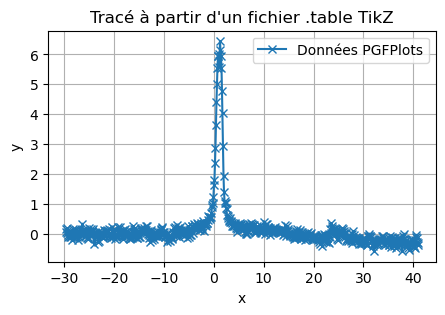

✅ Fichier enregistré sous : GHD_bord_article_distribution_24-04-2024.table
# x y type
-20.57143 0.00000 i
-20.36557 0.00023 i
-20.15954 0.00048 i
-19.95340 0.00075 i
-19.74720 0.00104 i
-19.54097 0.00135 i
-19.33474 0.00169 i
-19.12850 0.00206 i
-18.92228 0.00245 i
-18.71607 0.00287 i
-18.50988 0.00332 i
-18.30372 0.00381 i
-18.09759 0.00433 i
-17.89149 0.00489 i
-17.68542 0.00549 i
-17.47939 0.00614 i
-17.27341 0.00683 i
-17.06746 0.00757 i
-16.86157 0.00836 i
-16.65572 0.00920 i
-16.44993 0.01011 i
-16.24420 0.01107 i
-16.03852 0.01211 i
-15.83291 0.01321 i
-15.62737 0.01439 i
-15.42190 0.01565 i
-15.21650 0.01699 i
-15.01119 0.01842 i
-14.80595 0.01994 i
-14.60081 0.02157 i
-14.39576 0.02330 i
-14.19081 0.02515 i
-13.98596 0.02712 i
-13.78123 0.02922 i
-13.57661 0.03145 i
-13.37212 0.03382 i
-13.16775 0.03636 i
-12.96352 0.03905 i
-12.75944 0.04192 i
-12.55552 0.04497 i
-12.35175 0.04822 i
-12.14816 0.05168 i
-11.94475 0.05537 i
-11.74153 0.05929 i
-11.53852 0.06347 i
-11.33573 0.06

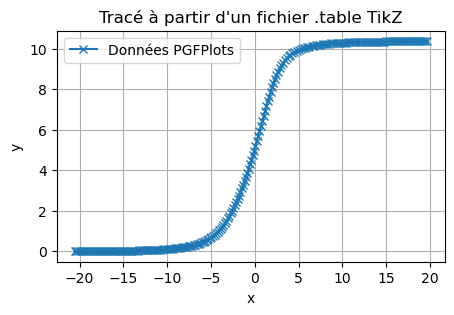

✅ Fichier enregistré sous : GHD_bord_2_article_distribution_24-04-2024.table
# x y type
-20.57143 0.00000 i
-20.37321 0.00224 i
-20.17393 0.00486 i
-19.97345 0.00771 i
-19.77215 0.01074 i
-19.57028 0.01394 i
-19.36802 0.01728 i
-19.16548 0.02078 i
-18.96276 0.02443 i
-18.75990 0.02822 i
-18.55695 0.03217 i
-18.35395 0.03627 i
-18.15092 0.04054 i
-17.94788 0.04497 i
-17.74486 0.04957 i
-17.54186 0.05434 i
-17.33890 0.05930 i
-17.13600 0.06445 i
-16.93315 0.06980 i
-16.73038 0.07535 i
-16.52768 0.08111 i
-16.32507 0.08709 i
-16.12256 0.09329 i
-15.92014 0.09974 i
-15.71784 0.10643 i
-15.51565 0.11338 i
-15.31359 0.12060 i
-15.11166 0.12809 i
-14.90986 0.13588 i
-14.70821 0.14397 i
-14.50672 0.15237 i
-14.30538 0.16111 i
-14.10421 0.17019 i
-13.90321 0.17962 i
-13.70240 0.18944 i
-13.50178 0.19964 i
-13.30136 0.21026 i
-13.10115 0.22130 i
-12.90116 0.23279 i
-12.70140 0.24476 i
-12.50187 0.25721 i
-12.30260 0.27019 i
-12.10358 0.28370 i
-11.90484 0.29779 i
-11.70637 0.31247 i
-11.50821 0.

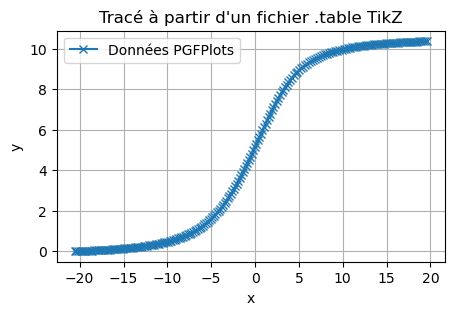

In [132]:
X , Y , label = X_1_18 , Y_1_18 , "legend"



### Plot style
police = 12
plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams["figure.figsize"] = (5,3)

### Plot
plt.figure()
plt.plot(X[mask], Y[mask], color = "goldenrod", label = "Boundary profile" )

nom1 = "theta_edge_1.0_ih1"
data_GHD = np.load(f"{date}/density_expansion_nu_{nom1}_{mu:.3f}_{T:.3f}_{'veff_bord'}.npz") 
plt.plot(data_GHD[0, :] * Temp_bord, data_GHD[1, :], color=plt.cm.inferno(0.6), linewidth=2, alpha=0.8,
         label=f"Fit : $T$ = {round(T, -1):.0f} nK")

X , Y , label = X_2_1 , Y_2_1 , "legend"
mask = (X < 100*Temp_bord)*(X>-100*Temp_bord)
#ax1.plot(X[mask], Y[mask], color='#1f77b4' ,label=f"donnés du "+ date_donnees + ' : ' + label )
plt.plot(X[mask], Y[mask], color='#1f77b4' ,label= "Selected slice" )

nom2 = "theta_edge_1.0_ih2"
mu_exp, T_exp, x0_exp, Taille_exp = 25.997, 1549.169, 18.3, 24.1
filename = f"{date}/density_expansion_nu_{nom1}_{mu_exp:.3f}_{T_exp:.3f}_{'veff_bord'}.npz"
#sync_files(USER, HOST, PASSWORD, remote_path0 + filename, local_path + "/"+ filename )
data_GHD2 = np.load(filename)
plt.plot(data_GHD2[0, :] * Temp_bord, data_GHD2[1, :], color=plt.cm.inferno(0.4), linewidth=2, alpha=0.8,
         label=f"$T$ = {round(T_exp, -1):.0f} nK")

# Ajouter une grille blanche
plt.grid(color='white', linestyle='-', linewidth=1)

# Appliquer un fond gris
#plt.gca().set_facecolor('lightgray')  # Fond gris pour le canevas


# Appliquer un fond gris clair au graphe
#plt.gca().set_facecolor('#f0f0f0')  # Fond gris très clair (hex pour personnalisation)
plt.gca().set_facecolor('#e8e8e8')  # Fond gris plus foncé

# Rendre le cadre invisible
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

#plt.gcf().set_facecolor('lightgray')  # Fond gris pour l'ensemble de la figure

# Ajouter une légende avec fond gris et bordure blanche
plt.legend(
    loc='upper left',
    fontsize=police,
    facecolor='#e8e8e8',  # Fond gris pour la légende
    #edgecolor='black',       # Bordure blanche pour la légende
    bbox_to_anchor=(0.005, 1)  # Ajuster ici (x, y)
)

plt.xlabel("$x\quad (\mu$m)", fontsize = police, color = "black")
plt.ylabel("$n\quad (\mu$m$^{-1}$)", fontsize = police, color = "black")
plt.xticks(fontsize = police, color = "black")
plt.yticks(fontsize = police, color = "black")
#plt.legend(fontsize = police)
plt.xlim(-200,150)
#plt.savefig("Figures/article_simul_deformation_1_24-04-2024-mu-T-x0=18.3.pdf", bbox_inches='tight', dpi = 300)
#plt.savefig("Figures/article_simul_deformation_1_24-04-2024-mu-T-x0=18.3.svg", bbox_inches='tight', dpi = 300)
#plt.savefig("Figures/article_simul_deformation_1_24-04-2024-mu-T-Taille=29.pdf", bbox_inches='tight', dpi = 300)
#plt.savefig("Figures/article_simul_deformation_1_24-04-2024-mu-T-Taille=29.svg", bbox_inches='tight', dpi = 300)
#plt.savefig("Figures/article_simul_deformation_1_24-04-2024-T-x0.pdf", bbox_inches='tight', dpi = 300)
#plt.savefig("Figures/article_simul_deformation_1_24-04-2024-T-x0.svg", bbox_inches='tight', dpi = 300)
plt.show()

# 150+200 mu m c'est 20 cm sur lon graphe 
# 60 mu m -1  c'est 11 cm sur lon graphe 
save_as_tikz_table(X_1_18*20/(150+200), Y_1_18*11/60, filename="donnee_bord_article_distribution_24-04-2024.table")
read_and_plot_table(filename="donnee_bord_article_distribution_24-04-2024.table")
save_as_tikz_table(X_2_1*20/(150+200), Y_2_1*11/60, filename="donnee_selection_1_article_distribution_24-04-2024.table")
read_and_plot_table(filename="donnee_selection_1_article_distribution_24-04-2024.table")
save_as_tikz_table(data_GHD[0, :] * Temp_bord*20/(150+200), data_GHD[1, :]*11/60, filename="GHD_bord_article_distribution_24-04-2024.table")
read_and_plot_table(filename="GHD_bord_article_distribution_24-04-2024.table")
save_as_tikz_table(data_GHD2[0, :] * Temp_bord*20/(150+200), data_GHD2[1, :]*11/60, filename="GHD_bord_2_article_distribution_24-04-2024.table")
read_and_plot_table(filename="GHD_bord_2_article_distribution_24-04-2024.table")

In [133]:
20/7

2.857142857142857

In [134]:
8.6+11.4

20.0